# Introduction
## Purpose
The purpose of this notebook is to make a portfolio project to showcase some basic data science skills.

This is the second project of this kind that I make. The first one was a rehash of a tutorial project. This one was made without following a tutorial.

This notebook is also available on [GitHub](https://github.com/m4rtinpf/SO_developer_survey).

## Topic
We will analyse the software market for jobs, from the point of view of the developers.

Some things we will explore are salaries, country of origin, size of companies, amount of hours worked per week, age, technologies worked with, and years of experience.

## Basic dataset
[Stack Overflow](https://stackoverflow.com/) is a question and answer site focused on computer programming. From their homepage:

>Stack Overflow is an open community for anyone that codes. We help you get answers to your toughest coding questions, share knowledge with your coworkers in private, and find your next dream job.

The [Stack Overflow Developer Survey](https://insights.stackoverflow.com/survey) is an annual survey held by Stack Overflow. In the 2020 edition (the tenth since its inception), 65,000 developers completed the survey, which was divided into several sections:

* Basic information
* Education, work and career
* Tech and tech culture
* Stack community
* Demographics
* Final thoughts about the survey

The [questions](https://drive.google.com/file/d/1dfGerWeWkcyQ9GX9x20rdSGj7WtEpzBB/edit) of the survey are available in PDF format.

## Additional datasets
To see how results extracted from the survey compared with the ones for entire populations (e.g., of an age group or a country), we will use World Bank data.

According to their Wikipedia [page](https://en.wikipedia.org/wiki/World_Bank):
>The World Bank is an international financial institution that provides loans and grants to the governments of low- and middle-income countries for the purpose of pursuing capital projects.

The World Bank makes available a huge amount of indicators through the [World Bank Data](https://data.worldbank.org/) website and its API (Application Programming Interface). We will access this data through a specific Python package.

# Data collection
The first part of the process is collecting the data, or read it in from the different sources (tabular files in this case).

To do this, the next code will:
* Download the file with the SO Survey dataset from Google Drive
* Read the `.csv` file into a `Pandas DataFrame`

After loading the dataset, we can print its first 20 rows and some basic information.

In [65]:
#!pip install -q googledrivedownloader
# Update seaborn to 0.11.1 (necessary for col_order)
!pip install -q --upgrade seaborn pandas

import pandas as pd
import numpy as np
import glob
from google_drive_downloader import GoogleDriveDownloader as gdd

# When using display(), show all rows, columns, and items
pd.set_option('display.max_columns', None, 'display.max_rows', None, 'display.max_seq_items', None)

so_survey_links = {
    2020: 'https://drive.google.com/file/d/1dfGerWeWkcyQ9GX9x20rdSGj7WtEpzBB',
}
for k, v in so_survey_links.items():
    file_id = v.rsplit('/', 1)[-1].rsplit('=', 1)[-1]
    dest_path = 'datasets/so_survey_{}/file.zip'.format(k)
    gdd.download_file_from_google_drive(file_id=file_id,
                                        dest_path=dest_path,
                                        unzip=True)

so_survey_2020 = pd.read_csv('datasets/so_survey_2020/survey_results_public.csv')

display(so_survey_2020.head(20))
display(so_survey_2020.shape)
display(so_survey_2020.info())
display(so_survey_2020.describe())

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

(64461, 61)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

None

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


# Data pre-processing
## Splitting columns

Looking at the previous output, we can see that some of the columns (for example `DatabaseDesireNextYear`) are formed by lists of strings, separated with semi-colons `;`. 

These columns are split into Boolean columns in the next code cell (each new column is `True` if the element it represents is present in the original column).

This was written into a function so we can easily loop through the columns that need splitting.

In [66]:
def split_column(df, col, sep, na_value):
    series = df[col].str.split(sep)
    for i in sorted(series[series.str.len() == series.str.len().max()].iloc[0], reverse=True):
        df.insert(
            column='{0}_{1}'.format(col, i),
            value=series.apply(lambda x: i in x if x == x else False),
            loc=df.columns.get_loc(col) + 1,
        )
    df.insert(
        column='{0}_number'.format(col),
        value=series.dropna().apply(len),
        loc=df.columns.get_loc(col) + 1,
    )
    return df


# Split multiple-option columns into multiple columns
for i in ['DatabaseDesireNextYear', 'DatabaseWorkedWith',
          'DevType', 'LanguageDesireNextYear', 'LanguageWorkedWith',
          'MiscTechDesireNextYear', 'MiscTechWorkedWith',
          'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWJobHunt', 'NEWJobHuntResearch',
          'NEWPurchaseResearch',
          'NEWStuck', 'PlatformDesireNextYear',
          'PlatformWorkedWith',
          'WebframeDesireNextYear',
          'WebframeWorkedWith']:
    so_survey_2020 = split_column(
        df=so_survey_2020,
        col=i,
        sep=';',
        na_value=False,
    )

display(so_survey_2020.head(20))
display(so_survey_2020.info())
display(so_survey_2020.shape)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseDesireNextYear_number,DatabaseDesireNextYear_Cassandra,DatabaseDesireNextYear_Couchbase,DatabaseDesireNextYear_DynamoDB,DatabaseDesireNextYear_Elasticsearch,DatabaseDesireNextYear_Firebase,DatabaseDesireNextYear_IBM DB2,DatabaseDesireNextYear_MariaDB,DatabaseDesireNextYear_Microsoft SQL Server,DatabaseDesireNextYear_MongoDB,DatabaseDesireNextYear_MySQL,DatabaseDesireNextYear_Oracle,DatabaseDesireNextYear_PostgreSQL,DatabaseDesireNextYear_Redis,DatabaseDesireNextYear_SQLite,DatabaseWorkedWith,DatabaseWorkedWith_number,DatabaseWorkedWith_Cassandra,DatabaseWorkedWith_Couchbase,DatabaseWorkedWith_DynamoDB,DatabaseWorkedWith_Elasticsearch,DatabaseWorkedWith_Firebase,DatabaseWorkedWith_IBM DB2,DatabaseWorkedWith_MariaDB,DatabaseWorkedWith_Microsoft SQL Server,DatabaseWorkedWith_MongoDB,DatabaseWorkedWith_MySQL,DatabaseWorkedWith_Oracle,DatabaseWorkedWith_PostgreSQL,DatabaseWorkedWith_Redis,DatabaseWorkedWith_SQLite,DevType,DevType_number,DevType_Academic researcher,DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_DevOps specialist,"DevType_Developer, QA or test","DevType_Developer, back-end","DevType_Developer, desktop or enterprise applications","DevType_Developer, embedded applications or devices","DevType_Developer, front-end","DevType_Developer, full-stack","DevType_Developer, game or graphics","DevType_Developer, mobile",DevType_Educator,"DevType_Engineer, data","DevType_Engineer, site reliability",DevType_Engineering manager,DevType_Marketing or sales professional,DevType_Product manager,DevType_Scientist,DevType_Senior executive/VP,DevType_System administrator,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageDesireNextYear_number,LanguageDesireNextYear_Assembly,LanguageDesireNextYear_Bash/Shell/PowerShell,LanguageDesireNextYear_C,LanguageDesireNextYear_C#,LanguageDesireNextYear_C++,LanguageDesireNextYear_Dart,LanguageDesireNextYear_Go,LanguageDesireNextYear_HTML/CSS,LanguageDesireNextYear_Haskell,LanguageDesireNextYear_Java,LanguageDesireNextYear_JavaScript,LanguageDesireNextYear_Julia,LanguageDesireNextYear_Kotlin,LanguageDesireNextYear_Objective-C,LanguageDesireNextYear_PHP,LanguageDesireNextYear_Perl,LanguageDesireNextYear_Python,LanguageDesireNextYear_R,LanguageDesireNextYear_Ruby,LanguageDesireNextYear_Rust,LanguageDesireNextYear_SQL,LanguageDesireNextYear_Scala,LanguageDesireNextYear_Swift,LanguageDesireNextYear_TypeScript,LanguageDesireNextYear_VBA,LanguageWorkedWith,LanguageWorkedWith_number,LanguageWorkedWith_Assembly,LanguageWorkedWith_Bash/Shell/PowerShell,LanguageWorkedWith_C,LanguageWorkedWith_C#,LanguageWorkedWith_C++,LanguageWorkedWith_Dart,LanguageWorkedWith_Go,LanguageWorkedWith_HTML/CSS,LanguageWorkedWith_Haskell,LanguageWorkedWith_Java,LanguageWorkedWith_JavaScript,LanguageWorkedWith_Julia,LanguageWorkedWith_Kotlin,LanguageWorkedWith_Objective-C,LanguageWorkedWith_PHP,LanguageWorkedWith_Perl,LanguageWorkedWith_Python,LanguageWorkedWith_R,LanguageWorkedWith_Ruby,LanguageWorkedWith_Rust,LanguageWorkedWith_SQL,LanguageWorkedWith_Scala,LanguageWorkedWith_Swift,LanguageWorkedWith_TypeScript,LanguageWorkedWith_VBA,MiscTechDesireNextYear,MiscTechDesireNextYear_number,MiscTechDesireNextYear_.NET,MiscTechDesireNextYear_.NET Core,MiscTechDesireNextYear_Ansible,MiscTechDesireNextYear_Apache Spark,MiscTechDesireNextYear_Chef,MiscTechDesireNextYear_Cordova,MiscTechDesireNextYear_Flutter,MiscTechDesireNextYear_Hadoop,MiscTechDesireNextYear_Keras,MiscTechDesireNextYear_Node.js,MiscTechDesireNextYear_Pandas,MiscTechDesireNextYear_Puppet,MiscTechDesireNextYear_React Native,MiscTechDesireNextYear_TensorFlow,MiscTechDesireNextYear_Teraform,MiscTechDesireNextYear_Torch/PyTorch,MiscTechDesireNextYear_Unity 3D,MiscTechDesireNextYear_Unreal Engine,Mi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Columns: 336 entries, Respondent to YearsCodePro
dtypes: bool(258), float64(21), int64(1), object(56)
memory usage: 54.2+ MB


None

(64461, 336)

## Replacing place-holders
The columns `Age1stCode`, `YearsCode` and `YearsCodePro` contain integers, but use place-holders for extreme values (e.g., `Younger than 5 years`, etc.). We will replace these by numeric values to ease the creation of plots.

In [67]:
# Replace place-holders
so_survey_2020['Age1stCode'] = so_survey_2020['Age1stCode'].replace('Younger than 5 years', 4)
so_survey_2020['Age1stCode'] = so_survey_2020['Age1stCode'].replace('Older than 85', 86)
so_survey_2020['Age1stCode'] = pd.to_numeric(so_survey_2020['Age1stCode'])
so_survey_2020['YearsCode'] = so_survey_2020['YearsCode'].replace('Less than 1 year', 0.5)
so_survey_2020['YearsCode'] = so_survey_2020['YearsCode'].replace('More than 50 years', 51)
so_survey_2020['YearsCode'] = pd.to_numeric(so_survey_2020['YearsCode'])
so_survey_2020['YearsCodePro'] = so_survey_2020['YearsCodePro'].replace('Less than 1 year', 0.5)
so_survey_2020['YearsCodePro'] = so_survey_2020['YearsCodePro'].replace('More than 50 years', 51)
so_survey_2020['YearsCodePro'] = pd.to_numeric(so_survey_2020['YearsCodePro'])

## Removing out-of-range values
We will replace all `Age` values less than 5 or greater than 100 by `NaN`s (`Not a Number`).

We will do the same for `WorkWeekHrs` (the number of hours worked per week) greater than 100.

In [68]:
so_survey_2020.loc[(so_survey_2020['Age'] < 5) | (so_survey_2020['Age'] > 100)] = np.nan
so_survey_2020.loc[so_survey_2020['WorkWeekHrs'] > 100] = np.nan

# Exploratory data analysis (EDA)
Now that we've dealt with pre-processing, we can set out to explore the data.


## Geography
First, we'll look at the country of origin of the respondents.

In the next code cell, we make a bar plot for the twenty most common countries.

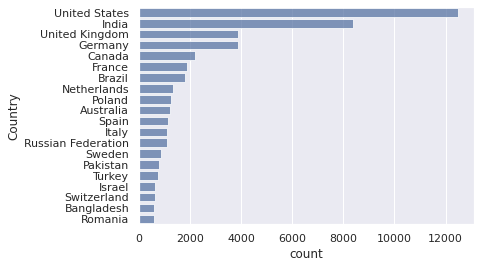

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

sns.set_theme()

def make_count_plot(data, col, ax, wrap_width=0, xticks_rotation=0, bar_order=None, n=None, **kwargs):
    df = data
    if bar_order is None:
        bar_order = data[col].value_counts().iloc[:n].index
    _ = sns.countplot(
        data=df,
        y=col,
        ax=ax,
        order=bar_order,
        color='b',
        alpha=0.75,
        **kwargs,
    )
    if wrap_width > 0:
        _ = ax.set_yticklabels([textwrap.fill(e, wrap_width) for e in bar_order])
    _ = plt.yticks(rotation=xticks_rotation)
    return ax


fig, axs = plt.subplots(1, 1)
ax = make_count_plot(
    data=so_survey_2020,
    col='Country',
    ax=axs,
    n=20,
)

We can see that the overwhelming majority of respondents come from the US, followed by India, the UK and Germany.

It would be useful to know if the distribution of respondents matches the distribution of the population for each country.

The [`world_bank_data`](https://github.com/mwouts/world_bank_data) package, that implements the [World Bank API v2](https://datahelpdesk.worldbank.org/knowledgebase/articles/889386-developer-information-overview) in Python, helps us to do this.

The World Bank provides indicators for the population of each country, segregated by age group. For example, [`SP.POP.0004.FE`](https://databank.worldbank.org/metadataglossary/population-estimates-and-projections/series/SP.POP.0004.FE) gives the female population between the ages 0 and 4.

To get this information we'll do this:

* First, we construct a list `series` of the names of the indicators to want to retrieve, minus their identifier for gender. For example, this list contains the string `SP.POP.0004`.

* Now a new list is created (`series_females`), with the names of the indicators for the female population. This is done by adding the ending `.FE` to each element of `series`.

* Then the method `get_series()` from the `world_bank_data` package is used on each element of `series_females`.

* The obtained list of `Pandas Series` is converted to a `DataFrame`.

* The process is repeated for the male population.

Now we generate a new `DataFrame` `population_by_age_totals`. We do this by adding the female and male population for each country and age group.

In [70]:
!pip install -q world_bank_data --upgrade
import world_bank_data as wb

series = ['SP.POP.{0:02d}{1:02d}'.format(i, i + 4) for i in range(0, 80, 5)]
series.append('SP.POP.80UP')

series_females = [s + '.FE' for s in series]
frames_females = [wb.get_series(s, mrv=1, simplify_index=True) for s in series_females]
population_by_age_females = pd.concat(frames_females, axis=1)

series_males = [s + '.MA' for s in series]
frames_males = [wb.get_series(s, mrv=1, simplify_index=True) for s in series_males]
population_by_age_males = pd.concat(frames_males, axis=1)

population_by_age_totals = pd.DataFrame()
for i in range(len(series)):
    population_by_age_totals[series[i]] = population_by_age_females[series_females[i]] + population_by_age_males[
        series_males[i]]
population_by_age_totals.reset_index(inplace=True)
display(population_by_age_totals['Country'].values)

array(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Late-demographic dividend', 'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle East & North Africa (IDA & IBRD c

We now calculate the total population by country for the World Bank data and plot these totals for the top twenty countries of origin. Then we can compare to see if this plot and the previous one are equally distributed.

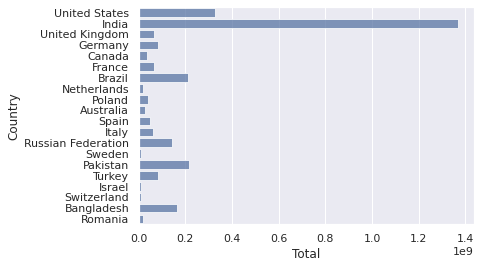

In [71]:
population_by_age_totals['Total'] = population_by_age_totals.sum(axis=1)

country_list = so_survey_2020.dropna(subset=['Country'])['Country'].value_counts().iloc[:20].index

_ = sns.barplot(
    x='Total',
    y='Country',
    data=population_by_age_totals.loc[population_by_age_totals['Country'].isin(country_list), :],
    order=country_list,
    color='C0',
    alpha=0.75,
)

The distributions look nothing alike. So the population of a country doesn't translate to the number of respondents.

We now weigh the number of respondents by the total population of their country. This gets us the percentage of the population that participated in the survey. Plotting gives the following results.

,Country,Total,percentage
United States,12466,3.282395e+08,0.003798
India,8385,1.366418e+09,0.000614
United Kingdom,3893,6.683440e+07,0.005825
Germany,3879,8.313280e+07,0.004666
Canada,2188,3.758926e+07,0.005821


,Country,Total,percentage
Iceland,53,361315.0,0.014669
Estonia,145,1326589.0,0.010930
Malta,47,502651.0,0.009350
Ireland,444,4941442.0,0.008985
Sweden,883,10285452.0,0.008585


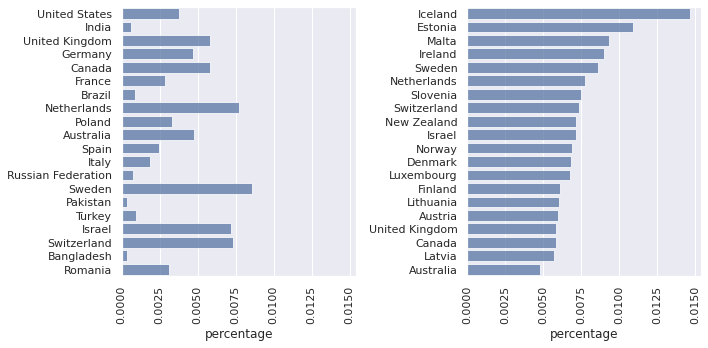

In [72]:
respondent_percentage_by_country_2020 = pd.concat(
    [so_survey_2020['Country'].value_counts(),
     population_by_age_totals.set_index('Country')['Total']],
    axis=1,
    join='inner',
)
respondent_percentage_by_country_2020 = respondent_percentage_by_country_2020[
    respondent_percentage_by_country_2020['Total'] != 0]
respondent_percentage_by_country_2020['percentage'] = respondent_percentage_by_country_2020['Country'] / \
                                                      respondent_percentage_by_country_2020['Total'] * 100
display(respondent_percentage_by_country_2020.head())
display(respondent_percentage_by_country_2020.sort_values(by='percentage', ascending=False).head())

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=False)
axs = axs.ravel()
_ = sns.barplot(
    x='percentage',
    y='index',
    data=respondent_percentage_by_country_2020[:20].reset_index(),
    ax=axs[0],
    color='C0',
    alpha=0.75,    
)
_ = axs[0].tick_params(
    axis='x',
    rotation=90,
)
_ = axs[0].set_ylabel('')

_ = sns.barplot(
    x='percentage',
    y='index',
    data=respondent_percentage_by_country_2020.sort_values(by='percentage', ascending=False)[:20].reset_index(),
    ax=axs[1],
    color='C0',
    alpha=0.75,    
)
_ = axs[1].tick_params(
    axis='x',
    rotation=90,
)
_ = axs[1].set_ylabel('')

fig.tight_layout()

Again, the population of a country doesn't relate to participation in the survey.

In the plot on the left, there is the percentage of the population of each country that participated in the survey, for the twenty countries with most respondents.

On the right, there is the plot of the percentage of the population of each country that participated in the survey, ordered in decreasing order. Many countries have too few respondents to get statistically sound results (the sample sizes are too small). This could be further explored by discarding countries with too few samples.

## Developer types

A plot can help us examine how the respondents see themselves as developers.

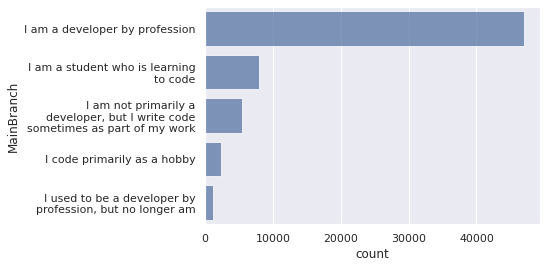

In [73]:
fig, axs = plt.subplots(1, 1)
axs = make_count_plot(
    data=so_survey_2020,
    col='MainBranch',
    ax=axs,
    wrap_width=30,
)

The vast majority of respondents said that they are developers by profession, followed by students learning to code.

In the survey, there was also a question asking whether the respondent was a hobbyist or not.

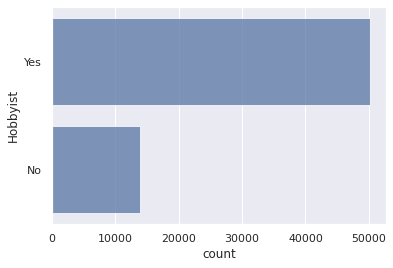

In [74]:
fig, axs = plt.subplots(1, 1)
axs = make_count_plot(
    data=so_survey_2020,
    col='Hobbyist',
    ax=axs,
)

There are about three times as many hobbyists than non-hobbyists.


## Demographics
The demographics of the respondents is another interesting thing to check out.

With a "histogram", we can observe how are the ages of the respondents distributed".

On a (vertical) histogram, we use the x-axis to represent the variable which we want to know the distribution of (for example, Age). We then divide this axis into ranges, called "bins" or "buckets".

Now we count the number of data points that fall into each range. For example, if one bin contains ages between 10 and 15, we will count how many respondents stated their ages as falling in that range. Then we draw a bar, where it's height is the count we got.

A histogram gives an idea of the shape of the distribution of the data.

The function `make_hist_plot` it's simply a convenience function; it only does some formatting adjustments for the plots.

In [75]:
def make_hist_plot(data, col, ax, wrap_width=None, **kwargs):
    df = data.dropna(subset=[col])
    bar_order = df[col].unique()
    _ = sns.histplot(
        data=df,
        x=col,
        ax=ax,
        **kwargs,
    )
    if wrap_width is not None:
        _ = ax.set_xticklabels([textwrap.fill(e, wrap_width) for e in bar_order])
    return ax

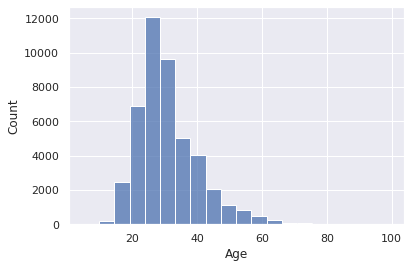

In [76]:
fig, axs = plt.subplots(1, 1)
axs = make_hist_plot(
    data=so_survey_2020,
    col='Age',
    ax=axs,
    bins=20,
)

We see that the majority of respondents are between 20 and 40 years, with a peak a little below 30 years.

Once more, we can use World Bank data to compare this distribution with the one for the entire world to see if they match.

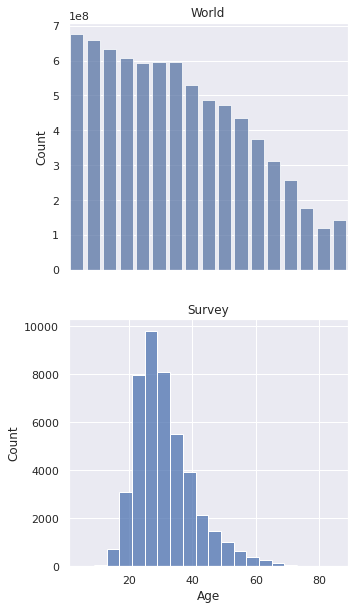

In [77]:
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
axs = axs.ravel()
axs[0] = sns.barplot(
    data=population_by_age_totals[population_by_age_totals['Country'] == 'World'].drop('Total', axis=1),
    orient='v',
    color= 'C0',
    alpha=0.75,
    ax=axs[0],
)
_ = axs[0].tick_params(
    axis='x',
    labelbottom=False,
)
_ = axs[0].set_ylabel('Count')
_ = axs[0].set_title('World')

axs[1] = make_hist_plot(
    data=so_survey_2020[so_survey_2020['Age'] <= 85],
    col='Age',
    ax=axs[1],
    bins=20,
)
_ = axs[1].set_title('Survey')

Despite the differences in scales and binning, the distribution of both plots is nothing alike. Meaning that there is a different distribution of ages for the respondents of the survey compared with the entire world population.

In the next plot, we can see that the majority of respondents are male.

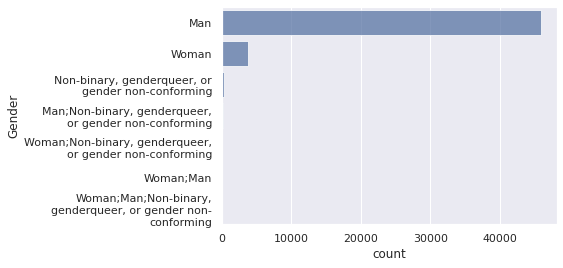

In [78]:
fig, axs = plt.subplots(1, 1)
ax = make_count_plot(
    data=so_survey_2020,
    col='Gender',
    ax=axs,
    wrap_width=30,
)

According to Stack Overflow, [the survey is biased towards men](https://insights.stackoverflow.com/survey/2020):
>12% of US respondents identify as women, but data from the US Bureau of Labor Statistics estimates that women's participation in the software developer workforce is about twice that, more like 20%

From a plot of the age at which the first line of code was written, we can see that most respondents began to code in their teenage years.

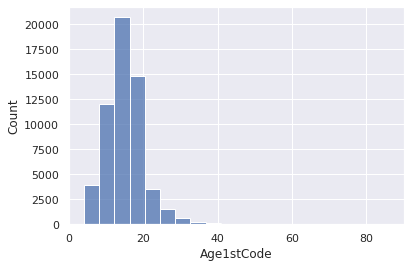

In [79]:
fig, axs = plt.subplots(1, 1)
axs = make_hist_plot(
    data=so_survey_2020,
    col='Age1stCode',
    ax=axs,
    bins=20,
)

## Economics
Now we'll look at the economic aspects, focusing on the yearly compensation of the respondents.

The relevant column here is `ConvertedComp`, the yearly compensation, converted to 2019 US dollars.

To simplify the analysis, we will focus our attention on the full-time-employed respondents:

* First, we create a new `DataFrame`, keeping only the respondents that are employed full-time. Then we drop all `NaN` values from the `ConvertedComp` column.

* Then we discard all rows in which `ConvertedComp` is less than or equal to zero or greater than or equal to `1000000 $/year`. We also discard all rows in which the average amount of hours worked per week `WorkWeekHrs` equals zero.

* Next, we create a new column `HourlyWage`,, that contains the wage earned per hour. It is calculated considering the annual compensation `ConvertedComp`, the average amount of hours worked per week `WorkWeekHrs`, and `50 weeks/year`.

* Now we remove hourly wages less than or equal to `0.3 $/hour` or greater than or equal to `500 $/hour`.

* Lastly, we insert a new column `YearlyWage` that represents the **equivalent** yearly wage. It is calculated using `HourlyWage` and considering `50 weeks/year` and `40 work-hours/week`.

In [80]:
employed_full_time = so_survey_2020[so_survey_2020['Employment'] == 'Employed full-time'].dropna(
    subset=['ConvertedComp'])
employed_full_time = employed_full_time[
    (employed_full_time['ConvertedComp'] > 0) & (employed_full_time['ConvertedComp'] < 1e6)]
employed_full_time = employed_full_time[employed_full_time['WorkWeekHrs'] > 0]
employed_full_time.insert(
    column='HourlyWage',
    value=employed_full_time['ConvertedComp'] / 50 / employed_full_time['WorkWeekHrs'],
    loc=employed_full_time.columns.get_loc('ConvertedComp') + 1,
)
employed_full_time = employed_full_time[
    (employed_full_time['HourlyWage'] > 0.3) & (employed_full_time['HourlyWage'] < 500)]
# Equivalent yearly wage if working 50 weeks with 40 work-hours each
employed_full_time.insert(
    column='YearlyWage',
    value=employed_full_time['HourlyWage'] * 50 * 40,
    loc=employed_full_time.columns.get_loc('HourlyWage') + 1,
)
display(employed_full_time.head())
display(employed_full_time.describe())
display(employed_full_time.shape)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,HourlyWage,YearlyWage,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseDesireNextYear_number,DatabaseDesireNextYear_Cassandra,DatabaseDesireNextYear_Couchbase,DatabaseDesireNextYear_DynamoDB,DatabaseDesireNextYear_Elasticsearch,DatabaseDesireNextYear_Firebase,DatabaseDesireNextYear_IBM DB2,DatabaseDesireNextYear_MariaDB,DatabaseDesireNextYear_Microsoft SQL Server,DatabaseDesireNextYear_MongoDB,DatabaseDesireNextYear_MySQL,DatabaseDesireNextYear_Oracle,DatabaseDesireNextYear_PostgreSQL,DatabaseDesireNextYear_Redis,DatabaseDesireNextYear_SQLite,DatabaseWorkedWith,DatabaseWorkedWith_number,DatabaseWorkedWith_Cassandra,DatabaseWorkedWith_Couchbase,DatabaseWorkedWith_DynamoDB,DatabaseWorkedWith_Elasticsearch,DatabaseWorkedWith_Firebase,DatabaseWorkedWith_IBM DB2,DatabaseWorkedWith_MariaDB,DatabaseWorkedWith_Microsoft SQL Server,DatabaseWorkedWith_MongoDB,DatabaseWorkedWith_MySQL,DatabaseWorkedWith_Oracle,DatabaseWorkedWith_PostgreSQL,DatabaseWorkedWith_Redis,DatabaseWorkedWith_SQLite,DevType,DevType_number,DevType_Academic researcher,DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_DevOps specialist,"DevType_Developer, QA or test","DevType_Developer, back-end","DevType_Developer, desktop or enterprise applications","DevType_Developer, embedded applications or devices","DevType_Developer, front-end","DevType_Developer, full-stack","DevType_Developer, game or graphics","DevType_Developer, mobile",DevType_Educator,"DevType_Engineer, data","DevType_Engineer, site reliability",DevType_Engineering manager,DevType_Marketing or sales professional,DevType_Product manager,DevType_Scientist,DevType_Senior executive/VP,DevType_System administrator,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageDesireNextYear_number,LanguageDesireNextYear_Assembly,LanguageDesireNextYear_Bash/Shell/PowerShell,LanguageDesireNextYear_C,LanguageDesireNextYear_C#,LanguageDesireNextYear_C++,LanguageDesireNextYear_Dart,LanguageDesireNextYear_Go,LanguageDesireNextYear_HTML/CSS,LanguageDesireNextYear_Haskell,LanguageDesireNextYear_Java,LanguageDesireNextYear_JavaScript,LanguageDesireNextYear_Julia,LanguageDesireNextYear_Kotlin,LanguageDesireNextYear_Objective-C,LanguageDesireNextYear_PHP,LanguageDesireNextYear_Perl,LanguageDesireNextYear_Python,LanguageDesireNextYear_R,LanguageDesireNextYear_Ruby,LanguageDesireNextYear_Rust,LanguageDesireNextYear_SQL,LanguageDesireNextYear_Scala,LanguageDesireNextYear_Swift,LanguageDesireNextYear_TypeScript,LanguageDesireNextYear_VBA,LanguageWorkedWith,LanguageWorkedWith_number,LanguageWorkedWith_Assembly,LanguageWorkedWith_Bash/Shell/PowerShell,LanguageWorkedWith_C,LanguageWorkedWith_C#,LanguageWorkedWith_C++,LanguageWorkedWith_Dart,LanguageWorkedWith_Go,LanguageWorkedWith_HTML/CSS,LanguageWorkedWith_Haskell,LanguageWorkedWith_Java,LanguageWorkedWith_JavaScript,LanguageWorkedWith_Julia,LanguageWorkedWith_Kotlin,LanguageWorkedWith_Objective-C,LanguageWorkedWith_PHP,LanguageWorkedWith_Perl,LanguageWorkedWith_Python,LanguageWorkedWith_R,LanguageWorkedWith_Ruby,LanguageWorkedWith_Rust,LanguageWorkedWith_SQL,LanguageWorkedWith_Scala,LanguageWorkedWith_Swift,LanguageWorkedWith_TypeScript,LanguageWorkedWith_VBA,MiscTechDesireNextYear,MiscTechDesireNextYear_number,MiscTechDesireNextYear_.NET,MiscTechDesireNextYear_.NET Core,MiscTechDesireNextYear_Ansible,MiscTechDesireNextYear_Apache Spark,MiscTechDesireNextYear_Chef,MiscTechDesireNextYear_Cordova,MiscTechDesireNextYear_Flutter,MiscTechDesireNextYear_Hadoop,MiscTechDesireNextYear_Keras,MiscTechDesireNextYear_Node.js,MiscTechDesireNextYear_Pandas,MiscTechDesireNextYear_Puppet,MiscTechDesireNextYear_React Native,MiscTechDesireNextYear_TensorFlow,MiscTechDesireNextYear_Teraform,MiscTechDesireNextYear_Torch/PyTorch,MiscTechDesireNextYear_Unity 3D,MiscTechDesireNex

,Respondent,Age,Age1stCode,CompTotal,ConvertedComp,HourlyWage,YearlyWage,DatabaseDesireNextYear_number,DatabaseDesireNextYear_Cassandra,DatabaseDesireNextYear_Couchbase,DatabaseDesireNextYear_DynamoDB,DatabaseDesireNextYear_Elasticsearch,DatabaseDesireNextYear_Firebase,DatabaseDesireNextYear_IBM DB2,DatabaseDesireNextYear_MariaDB,DatabaseDesireNextYear_Microsoft SQL Server,DatabaseDesireNextYear_MongoDB,DatabaseDesireNextYear_MySQL,DatabaseDesireNextYear_Oracle,DatabaseDesireNextYear_PostgreSQL,DatabaseDesireNextYear_Redis,DatabaseDesireNextYear_SQLite,DatabaseWorkedWith_number,DatabaseWorkedWith_Cassandra,DatabaseWorkedWith_Couchbase,DatabaseWorkedWith_DynamoDB,DatabaseWorkedWith_Elasticsearch,DatabaseWorkedWith_Firebase,DatabaseWorkedWith_IBM DB2,DatabaseWorkedWith_MariaDB,DatabaseWorkedWith_Microsoft SQL Server,DatabaseWorkedWith_MongoDB,DatabaseWorkedWith_MySQL,DatabaseWorkedWith_Oracle,DatabaseWorkedWith_PostgreSQL,DatabaseWorkedWith_Redis,DatabaseWorkedWith_SQLite,DevType_number,DevType_Academic researcher,DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_DevOps specialist,"DevType_Developer, QA or test","DevType_Developer, back-end","DevType_Developer, desktop or enterprise applications","DevType_Developer, embedded applications or devices","DevType_Developer, front-end","DevType_Developer, full-stack","DevType_Developer, game or graphics","DevType_Developer, mobile",DevType_Educator,"DevType_Engineer, data","DevType_Engineer, site reliability",DevType_Engineering manager,DevType_Marketing or sales professional,DevType_Product manager,DevType_Scientist,DevType_Senior executive/VP,DevType_System administrator,LanguageDesireNextYear_number,LanguageDesireNextYear_Assembly,LanguageDesireNextYear_Bash/Shell/PowerShell,LanguageDesireNextYear_C,LanguageDesireNextYear_C#,LanguageDesireNextYear_C++,LanguageDesireNextYear_Dart,LanguageDesireNextYear_Go,LanguageDesireNextYear_HTML/CSS,LanguageDesireNextYear_Haskell,LanguageDesireNextYear_Java,LanguageDesireNextYear_JavaScript,LanguageDesireNextYear_Julia,LanguageDesireNextYear_Kotlin,LanguageDesireNextYear_Objective-C,LanguageDesireNextYear_PHP,LanguageDesireNextYear_Perl,LanguageDesireNextYear_Python,LanguageDesireNextYear_R,LanguageDesireNextYear_Ruby,LanguageDesireNextYear_Rust,LanguageDesireNextYear_SQL,LanguageDesireNextYear_Scala,LanguageDesireNextYear_Swift,LanguageDesireNextYear_TypeScript,LanguageDesireNextYear_VBA,LanguageWorkedWith_number,LanguageWorkedWith_Assembly,LanguageWorkedWith_Bash/Shell/PowerShell,LanguageWorkedWith_C,LanguageWorkedWith_C#,LanguageWorkedWith_C++,LanguageWorkedWith_Dart,LanguageWorkedWith_Go,LanguageWorkedWith_HTML/CSS,LanguageWorkedWith_Haskell,LanguageWorkedWith_Java,LanguageWorkedWith_JavaScript,LanguageWorkedWith_Julia,LanguageWorkedWith_Kotlin,LanguageWorkedWith_Objective-C,LanguageWorkedWith_PHP,LanguageWorkedWith_Perl,LanguageWorkedWith_Python,LanguageWorkedWith_R,LanguageWorkedWith_Ruby,LanguageWorkedWith_Rust,LanguageWorkedWith_SQL,LanguageWorkedWith_Scala,LanguageWorkedWith_Swift,LanguageWorkedWith_TypeScript,LanguageWorkedWith_VBA,MiscTechDesireNextYear_number,MiscTechDesireNextYear_.NET,MiscTechDesireNextYear_.NET Core,MiscTechDesireNextYear_Ansible,MiscTechDesireNextYear_Apache Spark,MiscTechDesireNextYear_Chef,MiscTechDesireNextYear_Cordova,MiscTechDesireNextYear_Flutter,MiscTechDesireNextYear_Hadoop,MiscTechDesireNextYear_Keras,MiscTechDesireNextYear_Node.js,MiscTechDesireNextYear_Pandas,MiscTechDesireNextYear_Puppet,MiscTechDesireNextYear_React Native,MiscTechDesireNextYear_TensorFlow,MiscTechDesireNextYear_Teraform,MiscTechDesireNextYear_Torch/PyTorch,MiscTechDesireNextYear_Unity 3D,MiscTechDesireNextYear_Unreal Engine,MiscTechDesireNextYear_Xamarin,MiscTechWorkedWith_number,MiscTechWorkedWith_.NET,MiscTechWorkedWith_.NET Core,MiscTechWorkedWith_Ansible,MiscTechWorkedWith_Apache Spark,MiscTechWorkedWith_Chef,MiscTechWorkedWith_Cordova,Mi

(28774, 338)

Now we can plot a histogram of `YearlyWage` to see how it is distributed.

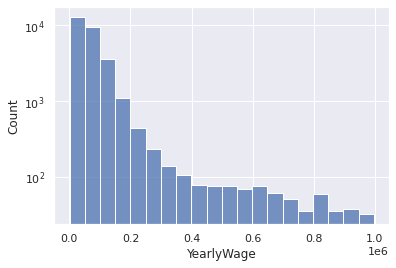

In [81]:
fig, axs = plt.subplots(1, 1)
axs = make_hist_plot(
    data=employed_full_time,
    col='YearlyWage',
    ax=axs,
    bins=20,
    log_scale=(False, True),
)

We can again use World Bank data to compare this distribution with the one for the entire world.

The World Bank provides [data for income distribution divided by quintiles](https://datacatalog.worldbank.org/income-share-held-lowest-20-4), instead of amounts of money.

According to [`Investopedia`](https://www.investopedia.com/terms/q/quintile.asp):

>A quintile is a statistical value of a data set that represents 20% of a given population, so the first quintile represents the lowest fifth of the data (1% to 20%); the second quintile represents the second fifth (21% to 40%) and so on.

The World Bank data for each quintile is not a single value per country. It is a time series, with values from 1960 to the present year. As there isn't information for every single year, we need to fill in the missing values. We only want a rough estimate of the income distribution, so we can do this with forward-filling. For example, if we have a value for 1967, and the next one is for 1975, we copy the 1967 value to the years 1968 through 1974.

After this is done, we get a `DataFrame` with a row for each country, a column for the country name, and a column for each quintile. This way to arrange data is called "messy data", by contrast with "tidy data". In [tidy data](https://vita.had.co.nz/papers/tidy-data.pdf):

* Each variable forms a column.
* Each observation forms a row.
* Each type of observational unit forms a table.

Data that is in a tidy format it's much easier to work with. To make our new dataset tidy, we simply need to use the `Pandas DataFrame` `.melt()` method on it.

In [82]:
income_distribution_list = [
    'SI.DST.FRST.20',
    'SI.DST.02ND.20',
    'SI.DST.03RD.20',
    'SI.DST.04TH.20',
    'SI.DST.05TH.20',
]
income_distribution_frames = []
for s in income_distribution_list:
    df = wb.get_series(s).reset_index()
    df[s] = df.groupby('Country', sort=False)[s].apply(lambda x: x.fillna(method='ffill'))
    df = df[df['Year'] == '2020'].drop(['Series', 'Year'], axis=1)
    income_distribution_frames.append(df.set_index('Country'))
country_income_distribution_2020 = pd.concat(income_distribution_frames, axis=1)
income_distribution_dict = dict(zip(income_distribution_list, list(range(1, 6))))
country_income_distribution_2020.rename(mapper=income_distribution_dict, inplace=True, axis=1)
country_income_distribution_2020 = country_income_distribution_2020.reset_index().melt(id_vars='Country',
                                                                                       var_name='Quintile').sort_values(
    by=['Country', 'Quintile'])

display(country_income_distribution_2020.head(20))
display(country_income_distribution_2020.groupby(by='Quintile').median())

,Country,Quintile,value
47,Afghanistan,1,NaN
311,Afghanistan,2,NaN
575,Afghanistan,3,NaN
839,Afghanistan,4,NaN
1103,Afghanistan,5,NaN
48,Albania,1,7.5
312,Albania,2,12.0
576,Albania,3,16.5
840,Albania,4,23.3
1104,Albania,5,40.7


,value
Quintile,
1,6.7
2,11.4
3,15.5
4,21.9
5,44.4


In this notebook, we will summarise the central tendency and the variability of data using the median and the inter-quartile range (IQR), because the data contains many outliers.

An outlier is a value that differs significantly from other observations, so it distorts summary statistics. The median and IQR are [robust statistics](https://en.wikipedia.org/wiki/Robust_statistics), meaning statistics that have good performance over a wide range of distributions (for example, ones with many outliers).

The more traditional mean and standard deviation are NOT robust statistics. They would be greatly affected by the presence of outliers.

Quoting [Lisa Sullivan, and Wayne W. LaMorte from Boston University](https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_summarizingdata/bs704_summarizingdata7.html):

>When there are no outliers in a sample, the mean and standard deviation are used to summarize a typical value and the variability in the sample, respectively. When there are outliers in a sample, the median and interquartile range are used to summarize a typical value and the variability in the sample, respectively.

The IQR is the difference between the first and third quartiles. A quartile is similar to a quintile, but it divides the population into fourths instead of fifths. So the first quartile represents 1% to 25% of the data, and the third quartile represents 76% to 100%.

If we plot the median income distribution for each quintile, we see that again the distributions don't match.

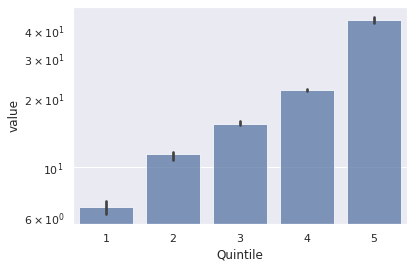

In [83]:
g = sns.barplot(
    data=country_income_distribution_2020,
    x='Quintile',
    y='value',
    orient='v',
    estimator=np.median,
    color='C0',
    alpha=0.75,
)
g.set_yscale('log')

Perhaps this discrepancy is because there are many different countries of origin in the survey.

If we now plot a separate histogram for the five countries with most full-time-employed respondents that stated their income, we get the below graphs.

(18467, 338)

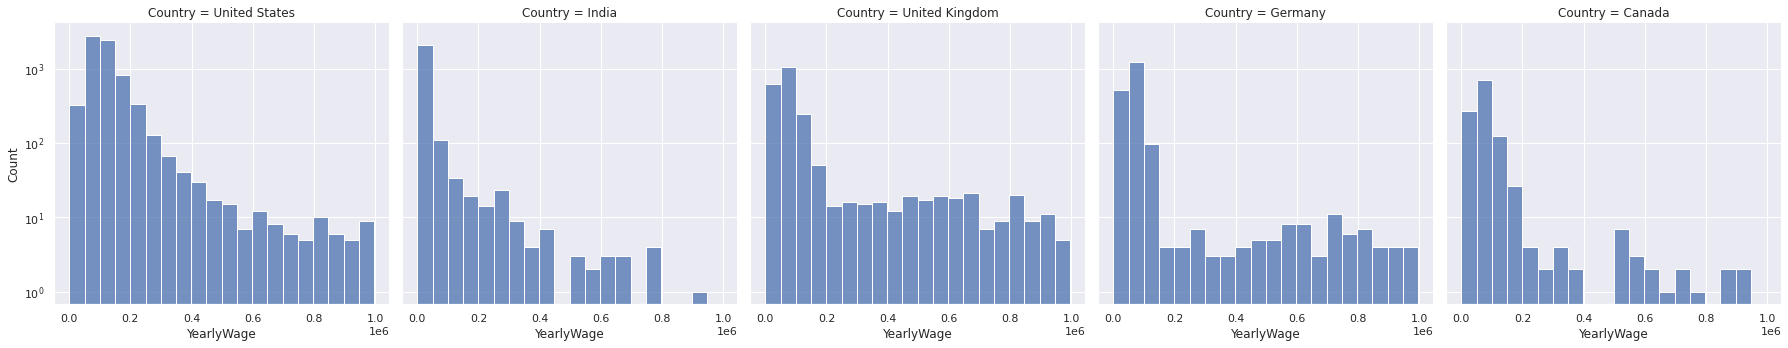

In [84]:
# Top ten countries by amount of full-time-employed respondents that specified their income
top10 = employed_full_time.dropna(subset=['YearlyWage', 'Country'])[
    employed_full_time.dropna(subset=['YearlyWage'])['Country'].isin(
        employed_full_time['Country'].value_counts().iloc[:10].index)]
display(top10.shape)

g = sns.displot(
    data=top10,
    x='YearlyWage',
    col='Country',
    col_order=top10['Country'].value_counts().iloc[:5].index,
    kind='hist',
    bins=20,
    log_scale=(False, True),
)

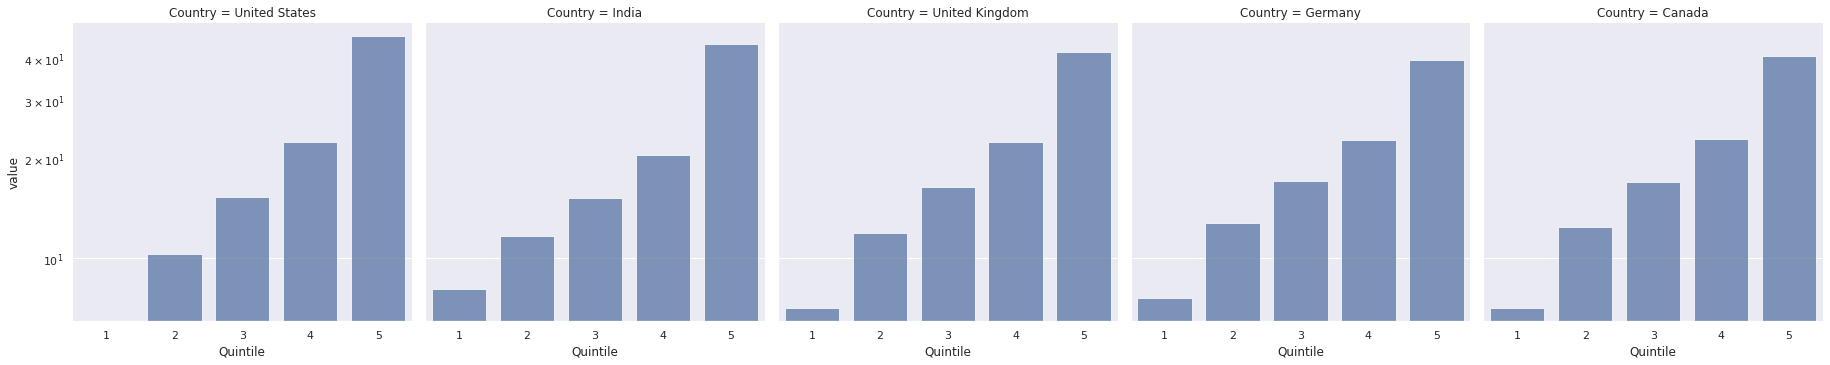

In [85]:
g = sns.catplot(
    data=country_income_distribution_2020,
    x='Quintile',
    y='value',
    col='Country',
    col_order=top10['Country'].value_counts().iloc[:5].index,
    kind='bar',
    estimator=np.median,
    color='C0',
    alpha=0.75,    
)
_ = g.set(yscale='log')

One more time, the distributions are not similar to the ones for the entire countries.

The distributions for each country look alike, they are all skewed towards the low values. But histograms are not the best way to compare them.

An easier way to compare the `YearlyWage` for each country is a box plot.

A box plot aims to display the distribution and skewness of numerical data in a single graph, grouping data into quartiles. The next image shows its typical shape.

<img src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png" alt="Box plot" width="500"/>

*Source: [Towards Data Science: Understanding Boxplots](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)*

Below there is a box plot for the top ten countries by the number of full-time-employed respondents that stated their income.

*Note: In this notebook, outliers are suppressed on box plots to make them more readable.*

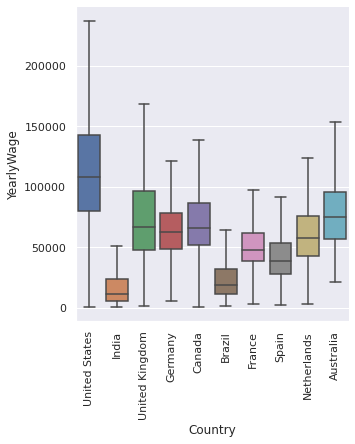

In [86]:
_ = sns.catplot(
    data=top10,
    y='YearlyWage',
    x='Country',
    kind='box',
    showfliers=False,
    order=top10['Country'].value_counts().iloc[:10].index,
)
_ = plt.xticks(rotation=90)

The highest median wages are in the US and the lowest in India.

## Employment
Now we can explore different variables related to employment.


First, we'll look at the type of employment of respondents with a bar plot (note the log scale on the x-axis).

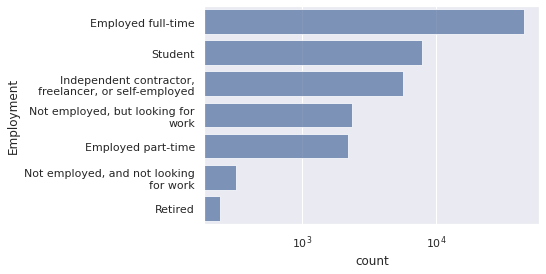

In [87]:
fig, axs = plt.subplots(1, 1)
ax = make_count_plot(
    data=so_survey_2020,
    col='Employment',
    ax=axs,
    wrap_width=30,
)
_ = ax.set(xscale='log')

Most of the respondents are full-time employees, followed by students, which are around five times less.

In the next plot, we can see that most respondents are satisfied with their jobs.

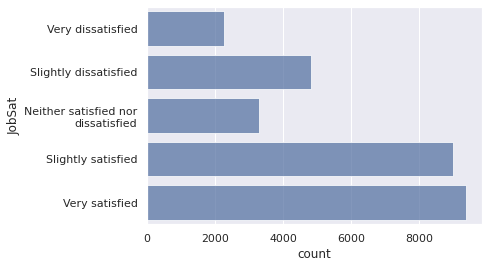

In [88]:
bar_order = [
    'Very dissatisfied',
    'Slightly dissatisfied',
    'Neither satisfied nor dissatisfied',
    'Slightly satisfied',
    'Very satisfied',
]
fig, axs = plt.subplots(1, 1)
ax = make_count_plot(
    data=employed_full_time,
    col='JobSat',
    ax=axs,
    wrap_width=30,
    bar_order=bar_order,
)

Most of the respondents are not actively looking for a job change, but they are open to new opportunities.

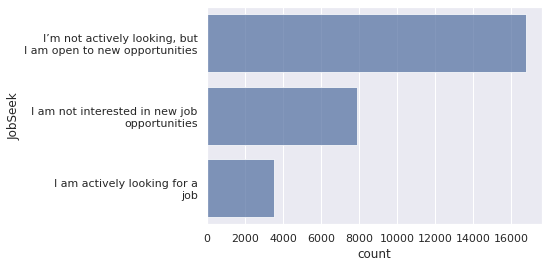

In [89]:
fig, axs = plt.subplots(1, 1)
ax = make_count_plot(
    data=employed_full_time,
    col='JobSeek',
    ax=axs,
    wrap_width=30,
)

In the plot below we can see that working overtime it's quite common.


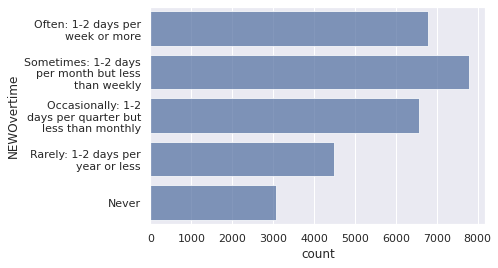

In [90]:
bar_order = [
    'Often: 1-2 days per week or more',
    'Sometimes: 1-2 days per month but less than weekly',
    'Occasionally: 1-2 days per quarter but less than monthly',
    'Rarely: 1-2 days per year or less',
    'Never',
]
fig, axs = plt.subplots(1, 1)
ax = make_count_plot(
    data=employed_full_time,
    col='NEWOvertime',
    ax=axs,
    bar_order=bar_order,
    wrap_width=20,
)

Most respondents work in companies with 20 to 99 employees, followed closely by ones with 100 to 499, and a little further by ones with 10000 or more.


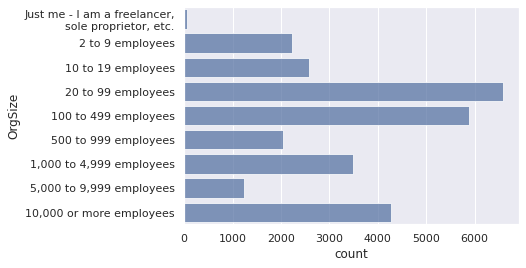

In [91]:
bar_order = [
    'Just me - I am a freelancer, sole proprietor, etc.',
    '2 to 9 employees',
    '10 to 19 employees',
    '20 to 99 employees',
    '100 to 499 employees',
    '500 to 999 employees',
    '1,000 to 4,999 employees',
    '5,000 to 9,999 employees',
    '10,000 or more employees',
]
fig, axs = plt.subplots(1, 1)
ax = make_count_plot(
    data=employed_full_time,
    col='OrgSize',
    ax=axs,
    bar_order=bar_order,
    wrap_width=30,
)

With a box plot, we can visualise how are the equivalent yearly wages distributed for each company size.


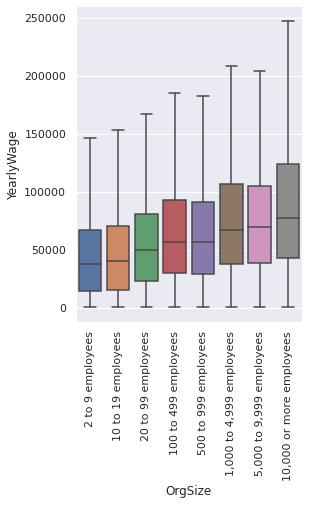

In [92]:
bar_order = [
    '2 to 9 employees',
    '10 to 19 employees',
    '20 to 99 employees',
    '100 to 499 employees',
    '500 to 999 employees',
    '1,000 to 4,999 employees',
    '5,000 to 9,999 employees',
    '10,000 or more employees',
]
_ = sns.catplot(
    data=employed_full_time,
    y='YearlyWage',
    x='OrgSize',
    kind='box',
    showfliers=False,
    order=bar_order,
)
_ = plt.xticks(rotation=90)

The plot shows that the bigger the company, the higher the pay.


Next, we plot a histogram of the hours worked per week. The vast majority of respondents worked around 40 hours per week.


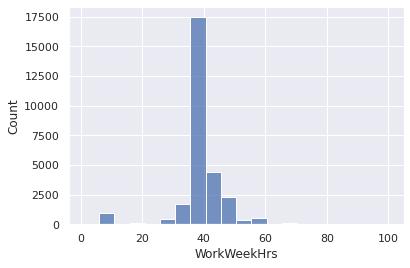

In [93]:
fig, axs = plt.subplots(1, 1)
ax = make_hist_plot(
    data=employed_full_time,
    col='WorkWeekHrs',
    ax=axs,
    # log_scale=(False, True),
    bins=20,
)

The following box plot shows the number of hours worked per week for different company sizes.

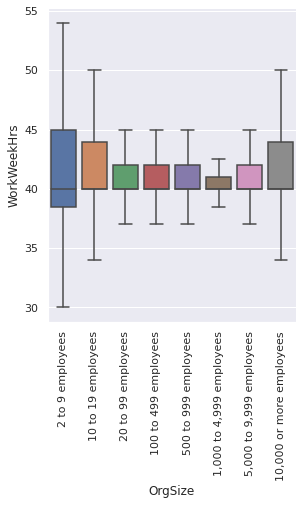

In [94]:
bar_order = [
    '2 to 9 employees',
    '10 to 19 employees',
    '20 to 99 employees',
    '100 to 499 employees',
    '500 to 999 employees',
    '1,000 to 4,999 employees',
    '5,000 to 9,999 employees',
    '10,000 or more employees',
]
_ = sns.catplot(
    data=employed_full_time,
    y='WorkWeekHrs',
    x='OrgSize',
    kind='box',
    showfliers=False,
    order=bar_order,
)
_ = plt.xticks(rotation=90)

The medians aren't clearly distinguishable, except for the first category. This means that the distribution of the data is highly skewed.

By calculating the median and making a histogram for each organisation size, we can observe more clearly what's going on.

OrgSize
2 to 9 employees            40.0
10 to 19 employees          40.0
20 to 99 employees          40.0
100 to 499 employees        40.0
500 to 999 employees        40.0
1,000 to 4,999 employees    40.0
5,000 to 9,999 employees    40.0
10,000 or more employees    40.0
Name: WorkWeekHrs, dtype: float64

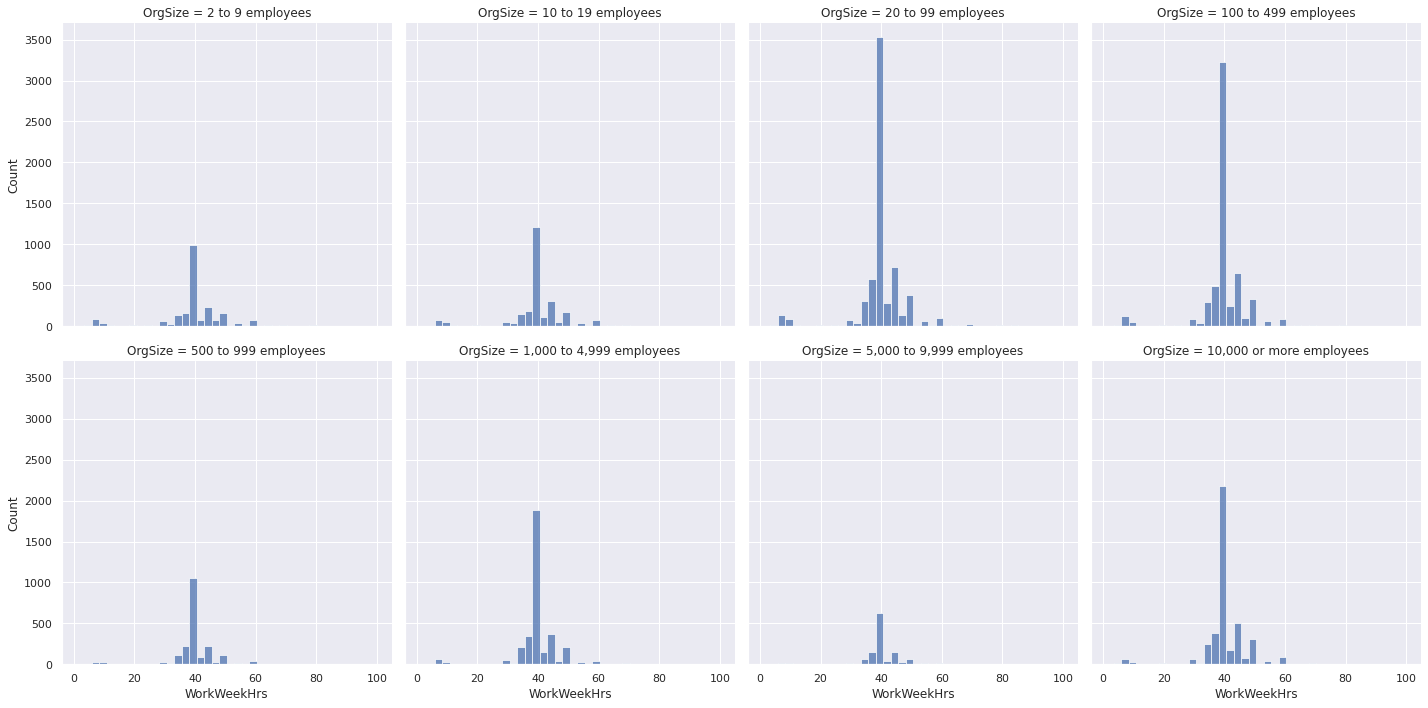

In [95]:
bar_order = [
    '2 to 9 employees',
    '10 to 19 employees',
    '20 to 99 employees',
    '100 to 499 employees',
    '500 to 999 employees',
    '1,000 to 4,999 employees',
    '5,000 to 9,999 employees',
    '10,000 or more employees',
]

g = sns.displot(
    data=employed_full_time,
    x='WorkWeekHrs',
    col='OrgSize',
    col_order=bar_order,
    col_wrap=4,
    kind='hist',
    bins=40,
)

display(employed_full_time.groupby(by='OrgSize')['WorkWeekHrs'].median()[bar_order])

The median worked hours per week is independent of organisation size, always equaling `40 hours`.

The histograms don't clearly show the distribution of the data, because the vast majority of respondents worked `40 hours/week`. But the box plots tell us that the distributions are highly skewed towards the median (`40 hours/week`).

We can conclude that, as the size of the organisation grows, the distribution of hours worked per week gets more skewed. This is so until we reach organisations with 1,000 to 4,999 employees, after that, it gets less skewed.

The column `YearsCode` contains the number of years that the respondent has been coding for, including education.

From the plot, most respondents have been coding for around 8 years, and the distribution is skewed towards the low values.

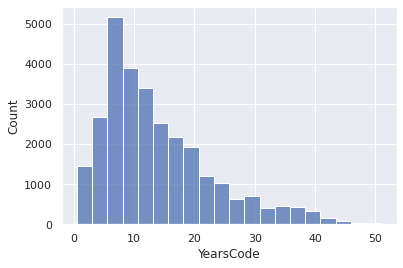

In [96]:
fig, axs = plt.subplots(1, 1)
ax = make_hist_plot(
    data=employed_full_time,
    col='YearsCode',
    ax=axs,
    bins=20,
)

With a box plot, we can see that bigger companies tend to have people who have coded for a slightly longer time.

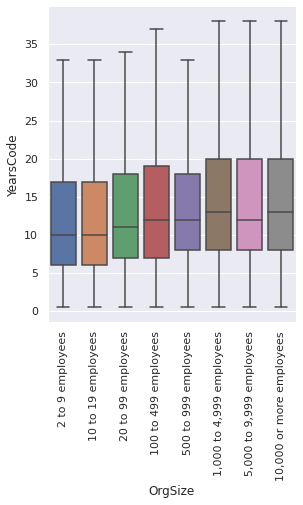

In [97]:
bar_order = [
    '2 to 9 employees',
    '10 to 19 employees',
    '20 to 99 employees',
    '100 to 499 employees',
    '500 to 999 employees',
    '1,000 to 4,999 employees',
    '5,000 to 9,999 employees',
    '10,000 or more employees',
]
_ = sns.catplot(
    data=employed_full_time,
    y='YearsCode',
    x='OrgSize',
    kind='box',
    showfliers=False,
    order=bar_order,
)
_ = plt.xticks(rotation=90)

We repeat the plot for the column `YearsCodePro`. It contains the years the respondents have been coding professionally, without including education. From the plot, we see that most respondents are recent hires. Besides that, the rest of the insights are similar to the ones for `YearsCode`.

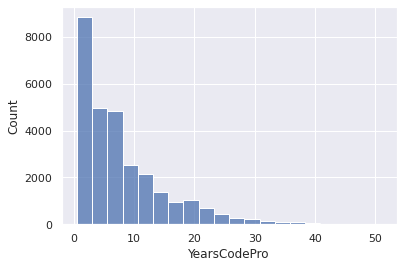

In [98]:
fig, axs = plt.subplots(1, 1)
ax = make_hist_plot(
    data=employed_full_time,
    col='YearsCodePro',
    ax=axs,
    bins=20,
)

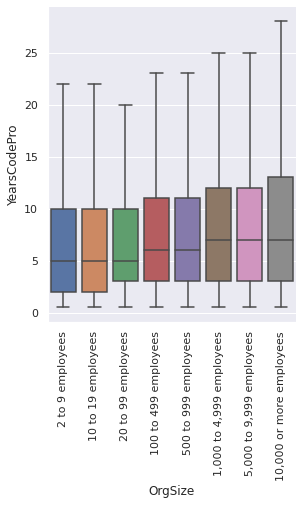

In [99]:
bar_order = [
    '2 to 9 employees',
    '10 to 19 employees',
    '20 to 99 employees',
    '100 to 499 employees',
    '500 to 999 employees',
    '1,000 to 4,999 employees',
    '5,000 to 9,999 employees',
    '10,000 or more employees',
]
_ = sns.catplot(
    data=employed_full_time,
    y='YearsCodePro',
    x='OrgSize',
    kind='box',
    showfliers=False,
    order=bar_order,
)
_ = plt.xticks(rotation=90)

At the beginning of the notebook, we said that some columns were formed by multiple options, separated by semi-colons `;`. These colums where split into several Boolean colums.

For example, for the `Respondent` `19`, the column `NEWJobHunt` equals `Having a bad day (or week or month) at work;Trouble with my teammates;Growth or leadership opportunities`. This column was split in several columns beginning with `NEWJobHunt_`, which are all `False`, except for `NEWJobHunt_Having a bad day (or week or month) at work`, `NEWJobHunt_Trouble with my teammates` and `NEWJobHunt_Growth or leadership opportunities`.

We can make a function that makes a bar plot of the number of `True` values for each column.

This function will first get the column names, by splitting on underscores `_` the name of each column in the `DataFrame` and keeping only the ones that:

* Begin with the supplied name (`NEWJobHunt` in this case).
* Don't end with the supplied name (so we don't select the column named simply `NEWJobHunt`).
* Don't end with `number` (to skip the column `NEWJobHunt_number`).

Then we slice the `DataFrame` which only has the needed columns, calculate the sum of each column (`True` is interpreted as `1` and `False` as `0`), sort descendingly, keep only the first `n` values, and get the indices instead of the values (the names of the columns).

With `seaborn`, we can make a bar plot, and with `textwrap`, we can wrap the text for the y-axis tick labels.

If we run this function on the `NEWJobHunt` column of the `employed_full_time` `DataFrame`, we can see that the number one reason to look for a new job was the desire for better compensation, followed by three career-advancement-related options, and then work/life balance.

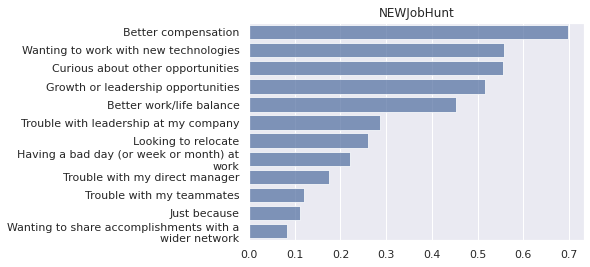

In [100]:
def make_boolean_plot(data, col, ax, wrap_width=0, yticks_rotation=0, n=None, **kwargs):
    cols_names = [x for x in data.columns if
                  (x.split('_')[0] == col) & (x.split('_')[-1] != col) & (x.split('_')[-1] != 'number')]
    cols = data[cols_names].sum().sort_values(ascending=False)[:n].index
    _ = sns.barplot(
        data=data[cols],
        ci=None,
        orient='h',
        color='C0',
        alpha=0.75,
        ax=ax,      
        **kwargs,
    )
    if wrap_width > 0:
        _ = ax.set_yticklabels([textwrap.fill(x.split('_')[-1], wrap_width) for x in cols], rotation=yticks_rotation)
    else:
        _ = ax.set_yticklabels([x.split('_')[-1] for x in cols], rotation=yticks_rotation)
    _ = ax.set_title(col)
    return ax
 
fig, axs = plt.subplots(1, 1)
axs = make_boolean_plot(
    data=employed_full_time,
    col='NEWJobHunt',
    ax=axs,
    wrap_width=40,
)

The column `NEWJobHuntResearch` corresponds to answers to the question:

>When job searching, how do you learn more about a company? 

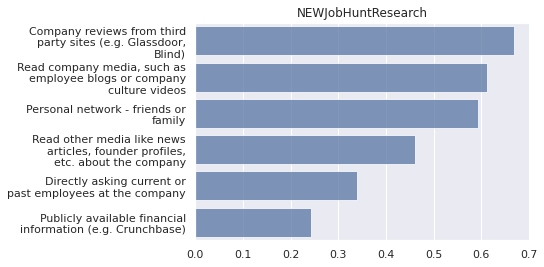

In [101]:
fig, axs = plt.subplots(1, 1)
axs = make_boolean_plot(
    data=employed_full_time,
    col='NEWJobHuntResearch',
    ax=axs,
    wrap_width=30,
)

This plot tells us that, primarily, respondents use reviews from third-party sites, then company media, and then their personal network to gather information during job searching.

The column `DevType` states what type of developer the respondents see themselves as.

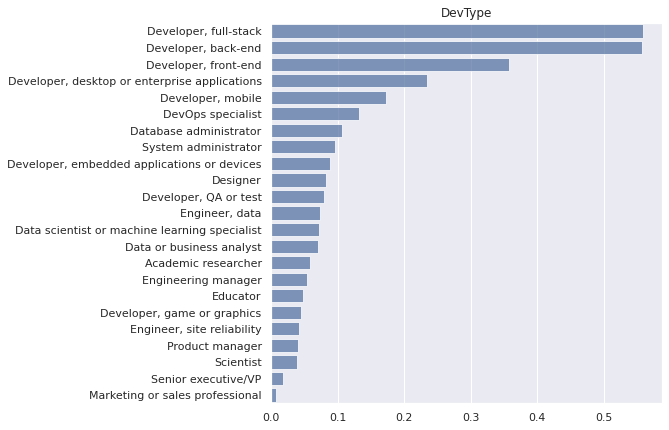

In [102]:
fig, axs = plt.subplots(1, 1, figsize=(7, 7))
axs = make_boolean_plot(
    data=employed_full_time,
    col='DevType',
    ax=axs,
    wrap_width=50,
)

Nearly all of the respondents said that they consider themselves full-stack and/or back-end developers, followed by front-end and desktop developers.

We can now look at how wages differ for each type of developer.

The function `calculate_statistics` calculates de median, IQR, 25th percentile, and 75th percentile of a column, grouped by a second column, for the `n` most common values of the second column.

Applying this function to the equivalent yearly wage, and grouping by the ten most popular developer types, we get the following, sorted by popularity.

,DevType,median,IQR,25th percentile,75th percentile
0,"Developer, full-stack",56874,65225,28308,93533
1,"Developer, back-end",55040,66023,27309,93333
2,"Developer, front-end",51347,62158,24320,86478
3,"Developer, desktop or enterprise applications",56723,62198,28619,90817
4,"Developer, mobile",45379,65077,18158,83236
5,DevOps specialist,68000,64004,39995,104000
6,Database administrator,51887,60382,25944,86326
7,System administrator,55574,58857,31142,90000
8,"Developer, embedded applications or devices",58446,65437,31127,96565
9,Designer,50311,60553,22714,83267


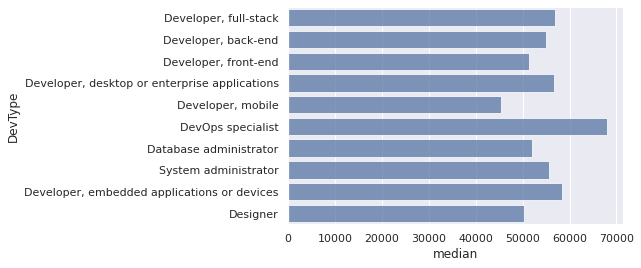

In [103]:
from scipy import stats

def calculate_statistics(data, col, value_col, n=None):
    cols_names = [x for x in data.columns if
                  (x.split('_')[0] == col) & (x.split('_')[-1] != col) & (x.split('_')[-1] != 'number')]
    cols = data[cols_names].sum().sort_values(ascending=False)[:n].index
    df_stats = pd.DataFrame(columns=[col, 'median', 'IQR', '25th percentile', '75th percentile'])
    for i in cols:
        value_slice = data[data[i] == True][value_col]
        df_stats = df_stats.append(pd.DataFrame([[
            i.split('_')[-1],
            value_slice.median(),
            stats.iqr(value_slice),
            np.percentile(value_slice, q=25),
            np.percentile(value_slice, q=75),
        ]],
            columns=df_stats.columns,
        ))
        df_stats[['median', 'IQR', '25th percentile', '75th percentile']] = df_stats[
            ['median', 'IQR', '25th percentile', '75th percentile']].astype('int')
    return df_stats.reset_index(drop=True)


display(calculate_statistics(employed_full_time, 'DevType', 'YearlyWage', n=10))
_ = sns.barplot(
    data=calculate_statistics(employed_full_time, 'DevType', 'YearlyWage', n=10),
    x='median',
    y='DevType',
    color='C0',
    alpha=0.75,    
)

From this output, we can observe that the median wage is around `55000 $/year`, with quite a big spread. There are 25th percentiles under `20000 $/year` and 75th percentiles over `100000 $/year`.

Repeating the process, but sorting by decreasing yearly wages and keeping only the top ten, we get the best-paid positions. These are engineering manager, senior executive/VP, and site reliability engineers. Their median wages are greater than `80000 $/year`.

,DevType,median,IQR,25th percentile,75th percentile
15,Engineering manager,88092,81197,52136,133333
21,Senior executive/VP,84156,83393,49940,133333
18,"Engineer, site reliability",79984,78839,46019,124858
5,DevOps specialist,68000,64004,39995,104000
11,"Engineer, data",64274,72347,32652,105000
20,Scientist,58666,60859,33083,93942
8,"Developer, embedded applications or devices",58446,65437,31127,96565
12,Data scientist or machine learning specialist,58304,68474,29303,97777
19,Product manager,57040,64046,28953,93000
0,"Developer, full-stack",56874,65225,28308,93533


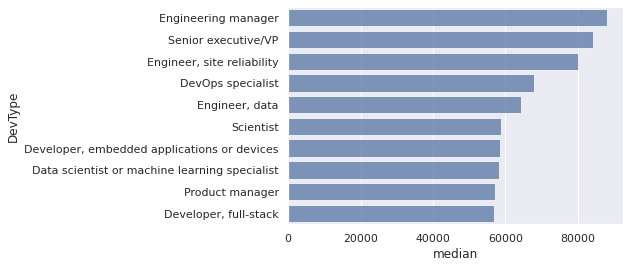

In [104]:
display(
    calculate_statistics(employed_full_time, 'DevType', 'YearlyWage').sort_values(by='median', ascending=False).iloc[
    :10])
_ = sns.barplot(
    data=calculate_statistics(employed_full_time, 'DevType', 'YearlyWage').sort_values(by='median',
                                                                                       ascending=False).iloc[:10],
    x='median',
    y='DevType',
    color='C0',
    alpha=0.75,    
)

One question that we may ask is:

>How much do data-related jobs represent?

To answer it, we create a new `DataFrame` called `data_employed_full_time`. First, we drop all columns that pertain to developer types other than those related to data. And then we keep only the rows in which the respondents stated that they were `Data or business analyst`, `Data scientist or machine learning specialist`, or `Engineer, data`.

Then we can calculate the fraction of respondents that have data-related jobs, compared to all full-time-employed respondents. This is around  `16%`.

In [105]:
data_employed_full_time = employed_full_time.drop(columns=[
    'DevType_Academic researcher',
    'DevType_Database administrator', 'DevType_Designer',
    'DevType_DevOps specialist', 'DevType_Developer, QA or test',
    'DevType_Developer, back-end',
    'DevType_Developer, desktop or enterprise applications',
    'DevType_Developer, embedded applications or devices',
    'DevType_Developer, front-end', 'DevType_Developer, full-stack',
    'DevType_Developer, game or graphics', 'DevType_Developer, mobile',
    'DevType_Educator',
    'DevType_Engineer, site reliability', 'DevType_Engineering manager',
    'DevType_Marketing or sales professional', 'DevType_Product manager',
    'DevType_Scientist', 'DevType_Senior executive/VP',
    'DevType_System administrator',
])
data_employed_full_time = data_employed_full_time[data_employed_full_time[[
    'DevType_Data or business analyst',
    'DevType_Data scientist or machine learning specialist',
    'DevType_Engineer, data',
]].sum(axis=1) != 0]
display(len(data_employed_full_time) / len(employed_full_time))

0.16188225481337318

If we look at how are salaries for data jobs, we get slightly higher equivalent yearly wages.

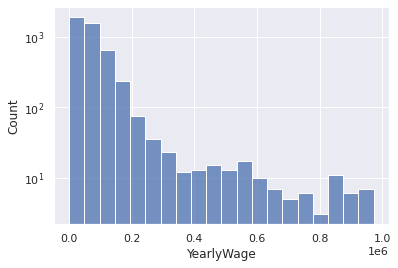

In [106]:
fig, axs = plt.subplots(1, 1)
axs = make_hist_plot(
    data=data_employed_full_time,
    col='YearlyWage',
    ax=axs,
    bins=20,
    log_scale=(False, True),
)

,DevType,median,IQR,25th percentile,75th percentile
0,"Engineer, data",64274,72347,32652,105000
1,Data scientist or machine learning specialist,58304,68474,29303,97777
2,Data or business analyst,56329,61801,26198,88000


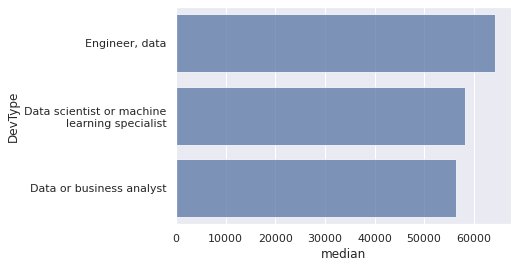

In [107]:
display(calculate_statistics(data_employed_full_time, 'DevType', 'YearlyWage').sort_values(by='median',
                                                                                           ascending=False).iloc[:10])
ax = sns.barplot(
    data=calculate_statistics(data_employed_full_time, 'DevType', 'YearlyWage').sort_values(by='median',
                                                                                            ascending=False).iloc[:10],
    x='median',
    y='DevType',
    color='C0',
    alpha=0.75,
)
_ = ax.set_yticklabels([
    textwrap.fill(e, 30) for e in
    calculate_statistics(
        data_employed_full_time, 'DevType', 'YearlyWage'
    ).sort_values(by='median', ascending=False).iloc[:10]['DevType']
])

## Education

Now we'll peer through the answers for the questions related to education.

The most common education level is a bachelor's degree, followed by a master's degree, and then having dropped out of college/university.

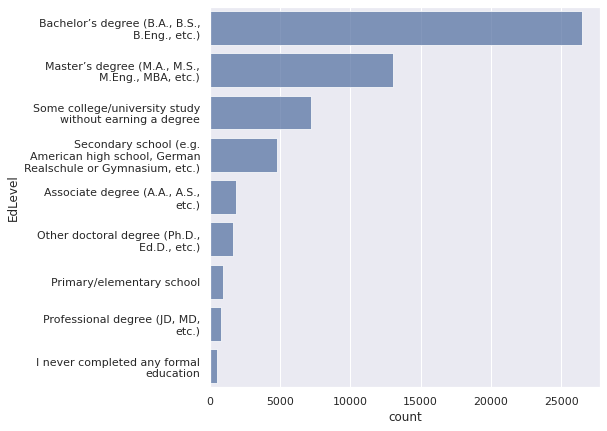

In [108]:
fig, axs = plt.subplots(1, 1, figsize=(7, 7))
ax = make_count_plot(
    data=so_survey_2020,
    col='EdLevel',
    ax=axs,
    wrap_width=30,
)

The column `NEWEdImpt` has the answers to the question:

>How important is a formal education, such as a university degree in computer science, to your career?

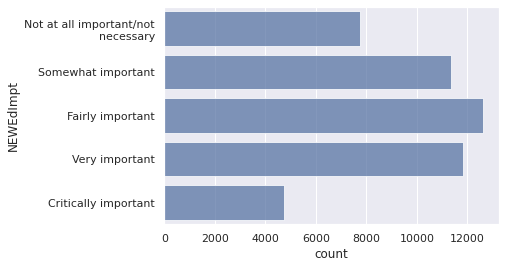

In [109]:
bar_order = [
    'Not at all important/not necessary',
    'Somewhat important',
    'Fairly important',
    'Very important',
    'Critically important',
]
fig, axs = plt.subplots(1, 1)
ax = make_count_plot(
    data=so_survey_2020,
    col='NEWEdImpt',
    ax=axs,
    bar_order=bar_order,
    wrap_width=30,
)

The most common answer is that education is fairly important, followed by very important and somewhat important.

We could ask ourselves:

>How important respondents consider education, considering their education level?

To answer we can repeat the previous bar plot, but segregating responses by education level attained.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


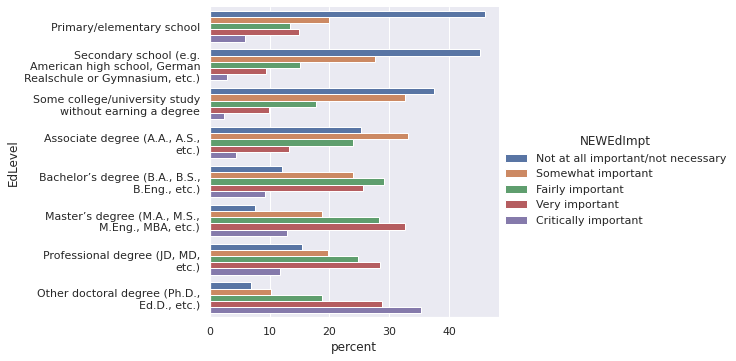

In [110]:
hue_order = [
    'Not at all important/not necessary',
    'Somewhat important',
    'Fairly important',
    'Very important',
    'Critically important',
]
bar_order = [
    'Primary/elementary school',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
    'Some college/university study without earning a degree',
    'Associate degree (A.A., A.S., etc.)',
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
    'Professional degree (JD, MD, etc.)',
    'Other doctoral degree (Ph.D., Ed.D., etc.)',
]
g = (
    so_survey_2020.groupby('EdLevel')['NEWEdImpt'].value_counts(normalize=True).mul(100).rename(
        'percent').reset_index().pipe(
        (sns.catplot, 'data'),
        x='percent',
        y='EdLevel',
        hue='NEWEdImpt',
        kind='bar',
        hue_order=hue_order,
        order=bar_order,
    )
)
_ = g.set_yticklabels([textwrap.fill(e, 30) for e in bar_order])

From this enlightening plot, we can see very clearly that the higher the level of education, the more important education was for respondents.

The column `NEWLearn` contains the answers to the question:

>How frequently do you learn a new language or framework?

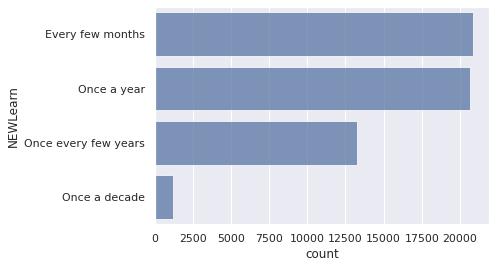

In [111]:
bar_order = [
    'Every few months',
    'Once a year',
    'Once every few years',
    'Once a decade',
]
fig, axs = plt.subplots(1, 1)
ax = make_count_plot(
    data=so_survey_2020,
    col='NEWLearn',
    ax=axs,
    bar_order=bar_order,
)

We can see that people learn new things rather frequently.

The next plot shows how undergraduate majors (the primary field of study for an undergraduate degree) are distributed.

According to Wikipedia:

* [Undergraduate education](https://en.wikipedia.org/wiki/Undergraduate_education):
>Undergraduate education is education conducted after secondary education and prior to postgraduate education. It typically includes all postsecondary programs up to the level of a bachelor's degree.

* [Academic major](https://en.wikipedia.org/wiki/Academic_major):
>An academic major is the academic discipline to which an undergraduate student formally commits. A student who successfully completes all courses required for the major qualifies for an undergraduate degree.

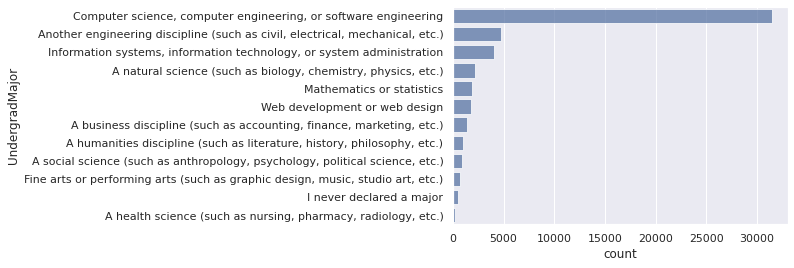

In [112]:
fig, axs = plt.subplots(1, 1)
ax = make_count_plot(
    data=so_survey_2020,
    col='UndergradMajor',
    ax=axs,
)

The majority of respondents come from a CS background, followed by other engineering disciplines.

## Technology

There are several columns which come in pairs. One column states the technologies with which the respondent has worked this year. The next one tells with which one will desire to work next year. For example, `DatabaseWorkedWith` and `DatabaseDesireNextYear`. These columns were split into several Boolean columns at the beginning of this notebook.

If we make bar plots for the `Database` columns, we can see that the most worked with databases where `MySQL`, `PostgreSQL`, and `Microsoft SQL Server`. The most desired ones were `PostgreSQL`, `MongoDB`, and `MySQL`.

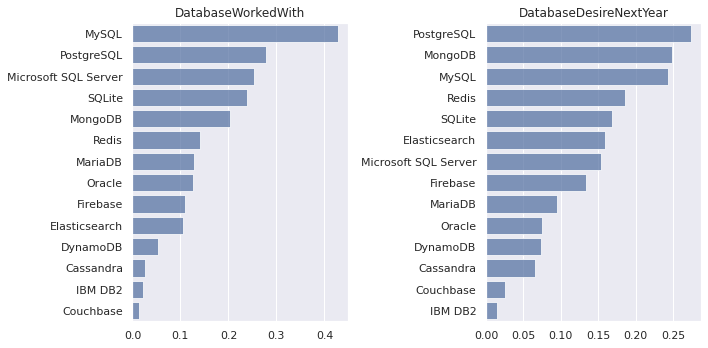

In [113]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs = axs.ravel()
axs[0] = make_boolean_plot(
    data=so_survey_2020,
    col='DatabaseWorkedWith',
    ax=axs[0],
)
axs[1] = make_boolean_plot(
    data=so_survey_2020,
    col='DatabaseDesireNextYear',
    ax=axs[1],
)
_ = fig.tight_layout()

An interesting question to ask is:

>Having worked with a certain technology this year, what is the probability of wanting to work with it again next year?

The below function calculates just that conditional probability, and it does so like this:

* First, it constructs a list of the columns beginning with the specified name (`Database` in this case), followed by the string `WorkedWith`, and the different options, preceded by an underscore `_`.
* In a similar way to `make_boolean_plot`, it creates a list of column names, sorted by decreasing popularity, and keeps the first `n`. It also initialises an empty `dictionary` `proba`.
* Next, it loops through each column of the list and:
  * Calculates the number of respondents that stated having worked with the technology this year `len_worked_with`.
  * Calculates the number of respondents that, having worked with the technology this year, desire to work with it again next year `len_next_year`.
  * Updates the `dictionary`, adding a new pair, with the name of the technology as key, and the probability as value (`len_next_year/len_worked_with`).
* Finally, it returns a `DataFrame` with the probability for each technology, sorted by decreasing popularity.

In [114]:
def conditional_proba(data, col, n=None):
    # Calculate probability that, having worked with a certain technology this year, a respondent would desire to 
    # work with it again next year 
    # Returns a DataFrame of probabilities, ordered by popularity of the technology (NOT
    # by probability) 
    # n: return n most popular technologies 
    col_worked_with = '{}WorkedWith'.format(col)
    cols_names = [x for x in data.columns if
                  (x.split('_')[0] == col_worked_with) & (x.split('_')[-1] != col_worked_with) & (
                          x.split('_')[-1] != 'number')]
    cols = data[cols_names].sum().sort_values(ascending=False)[:n].index
    proba = {}
    for i in cols:
        len_worked_with = len(data[data[i] == True])
        len_next_year = data[data[i] == True]['{0}DesireNextYear_{1}'.format(col, i.split('_')[-1])].sum()
        proba.update({i.split('_')[-1]: len_next_year / len_worked_with})
    return pd.DataFrame.from_dict(proba, orient='index', columns=['probability'])


display(conditional_proba(so_survey_2020, 'Database'))

,probability
MySQL,0.471327
PostgreSQL,0.638825
Microsoft SQL Server,0.509150
SQLite,0.494310
MongoDB,0.559859
Redis,0.664969
MariaDB,0.512579
Oracle,0.331733
Firebase,0.548823
Elasticsearch,0.586944


Sorting the output of `conditional_proba` for the `Database` columns, by decreasing probability, we can make a plot.

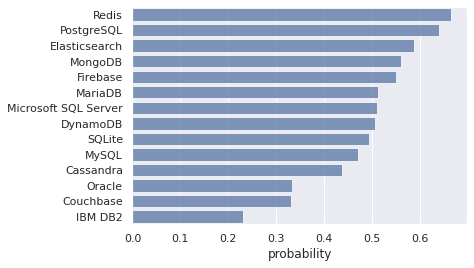

In [115]:
ax = sns.barplot(
    data=conditional_proba(so_survey_2020, 'Database').sort_values(by='probability', ascending=False).reset_index(),
    x='probability',
    y='index',
    color='C0',
    alpha=0.75,    
)
_ = ax.set_ylabel('')

The most likely technologies that, having worked with them this year, it will be desired to work with them again next year, are `Redis` (with probability `0.66`) and `PostgreSQL` (with `0.64`).

The least likely are `IBM DB2` (with `0.23`) and `Couchbase` (with `0.33`).

Another interesting thing to find is the most likely technology that a respondent would desire to work with, having worked with a certain technology this year, and with what probability.

The following function does that, and it works like this:
* This function works similarly to `conditional_proba`. It creates a list of column names for the technologies worked with this year, sorted by decreasing popularity, and keeps the first `n`. It also creates another list of columns with the technologies that are desired to work with next year.
* It initialises an empty `DataFrame` `df_proba`.
* Next, it loops through each column of the list and:
  * Calculates the number of respondents that stated having worked with the technology this year `len_worked_with`.
  * Calculates the number of respondents that, having worked with the technology this year, desire to work with each technology next year `len_next_year`.
  * Updates the `DataFrame`, adding a new row with the name of the technology worked with this year, the most likely technology to desire work with next year, and the probability that the desired technology is the listed one (`max((len_next_year)/len_worked_with)`).
* Finally, it returns the `DataFrame`, sorted by decreasing popularity.

In [116]:
def next_year_proba(data, col, n=None):
    # Calculate the most likely technology a respondent would desire to work with, having worked with a certain 
    # technology this year 
    # Returns a DataFrame of probabilities, ordered by popularity of the technology (NOT by 
    # probability) 
    # n: return n most popular technologies 
    col_worked_with = '{}WorkedWith'.format(col)
    cols_names = [x for x in data.columns if
                  (x.split('_')[0] == col_worked_with) & (x.split('_')[-1] != col_worked_with) & (
                          x.split('_')[-1] != 'number')]
    cols = data[cols_names].sum().sort_values(ascending=False)[:n].index
    cols_next_year = ['{0}DesireNextYear_{1}'.format(col, j.split('_')[-1]) for j in cols]
    df_proba = pd.DataFrame(columns=[col_worked_with, '{}DesireNextYear'.format(col), 'probability'])
    for i in cols:
        len_worked_with = len(data[data[i] == True])
        len_next_year = data[data[i] == True][cols_next_year].sum()
        df_proba = df_proba.append(pd.DataFrame(
            [[i.split('_')[-1], len_next_year.idxmax().split('_')[-1],
              len_next_year[len_next_year.idxmax()] / len_worked_with]],
            columns=[col_worked_with, '{}DesireNextYear'.format(col), 'probability'],
        ))
    return df_proba.reset_index(drop=True)


display(next_year_proba(so_survey_2020, 'Database'))

,DatabaseWorkedWith,DatabaseDesireNextYear,probability
0,MySQL,MySQL,0.471327
1,PostgreSQL,PostgreSQL,0.638825
2,Microsoft SQL Server,Microsoft SQL Server,0.509150
3,SQLite,SQLite,0.494310
4,MongoDB,MongoDB,0.559859
5,Redis,Redis,0.664969
6,MariaDB,MariaDB,0.512579
7,Oracle,MongoDB,0.348233
8,Firebase,Firebase,0.548823
9,Elasticsearch,Elasticsearch,0.586944


In this case, most people desire to keep working with the same technology next year, with a probability of roughly around `0.5`.

It's more interesting to look at the exceptions. For example, people who worked with `Oracle` this year are most likely to desire to work with `MongoDB` next year, with probability `0.35`.

Finally, we can calculate what's the most likely technology a respondent would desire to work with, having worked with a certain technology this year AND not wanting to work with it next year.

The function `next_year_switch` does this calculation, in a similar manner to `next_year_proba`.

,DatabaseWorkedWith,probability of switch,DatabaseSwitchDesireNextYear,probability
12,IBM DB2,0.768414,MongoDB,0.349309
13,Couchbase,0.668455,PostgreSQL,0.343499
7,Oracle,0.668267,MongoDB,0.328911
11,Cassandra,0.563183,PostgreSQL,0.352751
0,MySQL,0.528673,MongoDB,0.282507
3,SQLite,0.505690,MongoDB,0.291667
10,DynamoDB,0.493831,PostgreSQL,0.357350
2,Microsoft SQL Server,0.490850,PostgreSQL,0.298887
6,MariaDB,0.487421,PostgreSQL,0.340199
8,Firebase,0.451177,MongoDB,0.312305


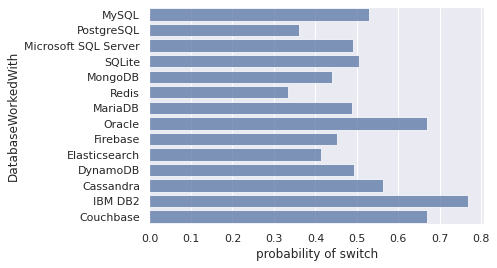

In [117]:
def next_year_switch(data, col, n=None):
    # Calculate the most likely technology a respondent would desire to work with, having worked with a certain 
    # technology this year AND not wanting to work with it next year 
    # Returns a DataFrame of probabilities, ordered by popularity of the technology (NOT by probability) 
    # n: return n most popular technologies 
    col_worked_with = '{}WorkedWith'.format(col)
    cols_names = [x for x in data.columns if
                  (x.split('_')[0] == col_worked_with) & (x.split('_')[-1] != col_worked_with) & (
                          x.split('_')[-1] != 'number')]
    cols = data[cols_names].sum().sort_values(ascending=False)[:n].index
    cols_next_year = ['{0}DesireNextYear_{1}'.format(col, j.split('_')[-1]) for j in cols]
    df_proba = pd.DataFrame(
        columns=[col_worked_with, 'probability of switch', '{}SwitchDesireNextYear'.format(col), 'probability'])
    for i in cols:
        len_worked_with = len(data[data[i] == True])
        len_switch = len(
            data[(data[i] == True) & (data['{0}DesireNextYear_{1}'.format(col, i.split('_')[-1])] == False)])
        len_next_year = \
            data[(data[i] == True) & (data['{0}DesireNextYear_{1}'.format(col, i.split('_')[-1])] == False)][
                cols_next_year].sum()
        df_proba = df_proba.append(pd.DataFrame(
            [
                [i.split('_')[-1],
                 len_switch / len_worked_with,
                 len_next_year.idxmax().split('_')[-1],
                 len_next_year[len_next_year.idxmax()] / len_switch],
            ],
            columns=[
                col_worked_with,
                'probability of switch',
                '{}SwitchDesireNextYear'.format(col),
                'probability',
            ],
        ))
    return df_proba.reset_index(drop=True)


display(next_year_switch(so_survey_2020, 'Database').sort_values(by='probability of switch', ascending=False))
_ = sns.barplot(
    data=next_year_switch(so_survey_2020, 'Database'),
    x='probability of switch',
    y='DatabaseWorkedWith',
    color='C0',
    alpha=0.75,    
)

From this output, we can see that there is a `0.77` probability that a respondent that worked with `IBM DB2` this year wouldn't desire to continue working with it next year, wanting to work with `MongoDB` instead, with a probability of `0.35`.

We can also see that the probabilities of wanting to switch are quite high, with a median probability of `0.49` and an IQR of `0.11`. And that the databases that respondents are more likely to want to switch to are only two, `PostgreSQL` and `MongoDB`.

If we repeat the process for programming languages, we get the following results.

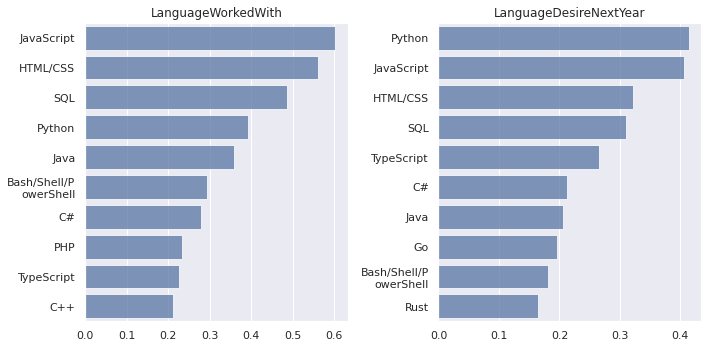

In [118]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs = axs.ravel()
axs[0] = make_boolean_plot(
    data=so_survey_2020,
    col='LanguageWorkedWith',
    ax=axs[0],
    n=10,
    wrap_width=12,
)
axs[1] = make_boolean_plot(
    data=so_survey_2020,
    col='LanguageDesireNextYear',
    ax=axs[1],
    n=10,
    wrap_width=12,
)
_ = fig.tight_layout()

,probability
Rust,0.861007
TypeScript,0.670915
Python,0.666574
Kotlin,0.627808
Go,0.622412
Dart,0.620370
Julia,0.619417
C#,0.596540
Swift,0.594563
JavaScript,0.583267


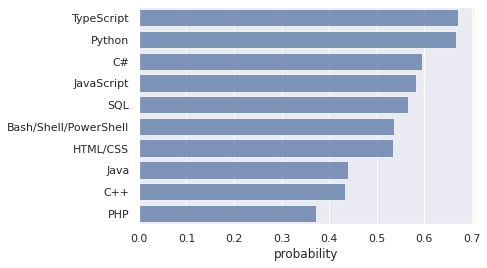

In [119]:
ax = sns.barplot(
    data=conditional_proba(so_survey_2020, 'Language', 10).sort_values(by='probability', ascending=False).reset_index(),
    x='probability',
    y='index',
    color='C0',
    alpha=0.75,    
)
_ = ax.set_ylabel('')

display(conditional_proba(so_survey_2020, 'Language').sort_values(by='probability', ascending=False))

In [120]:
display(next_year_proba(so_survey_2020, 'Language'))

,LanguageWorkedWith,LanguageDesireNextYear,probability
0,JavaScript,JavaScript,0.583267
1,HTML/CSS,JavaScript,0.566806
2,SQL,SQL,0.566149
3,Python,Python,0.666574
4,Java,Python,0.472957
5,Bash/Shell/PowerShell,Bash/Shell/PowerShell,0.537145
6,C#,C#,0.596540
7,PHP,JavaScript,0.570521
8,TypeScript,TypeScript,0.670915
9,C++,Python,0.534392


,LanguageWorkedWith,probability of switch,LanguageSwitchDesireNextYear,probability
15,VBA,0.803792,Python,0.483917
19,Objective-C,0.766953,Swift,0.415221
22,Perl,0.714605,Python,0.480031
14,Assembly,0.707214,Python,0.489600
10,C,0.669452,Python,0.483317
7,PHP,0.627660,Python,0.440998
13,Ruby,0.571853,Python,0.392548
9,C++,0.565637,Python,0.444761
4,Java,0.559087,Python,0.420795
17,R,0.555827,Python,0.523052


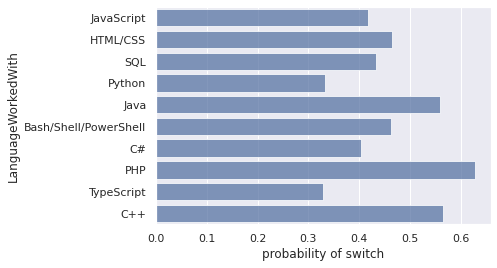

In [121]:
display(next_year_switch(so_survey_2020, 'Language').sort_values(by='probability of switch', ascending=False))
_ = sns.barplot(
    data=next_year_switch(so_survey_2020, 'Language', n=10),
    x='probability of switch',
    y='LanguageWorkedWith',
    color='C0',
    alpha=0.75,    
)

Analysing these results, we see that:
* The most worked with languages are `JavaScript`, `HTML/CSS`, and `SQL`.
* The most desired languages are `Python`, `JavaScript`, and `HTML/CSS`.
* The most likely languages that, having worked with them this year, it will be desired to work with them again next year, are `Rust`, `TypeScript`, and `Python`.
* The less likely languages that, having worked with them this year, it will be desired to work with them again next year, are `Perl`, `Objective-C`, and `VBA`.
* Once more we see that most people desire to work with the same technology next year, save for a few exceptions.
* Finally, we can see rather high probabilities of wanting to switch languages, and that in almost all cases the desired language is `Python`.

This same analysis could also be done for miscellaneous technologies, collaboration tools, platforms, and web frames.


# Correlations
As a basic metric of the relationships between columns, their correlations can be computed. The correlation is the statistical relationship between two variables. It is measured by a correlation coefficient.

In this case, we will use the [Pearson correlation coefficient](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) (or Pearson's r). This coefficient can take values between `-1` and `1`. A value of `0` means no correlation, the closer to `1` the stronger the positive correlation, and the closer to `-1` the stronger the negative correlation. The Pearson correlation coefficient can only be computed for the **numeric** columns in the dataset and is a measure of **linear** dependence.

To decide if two variables are correlated, we need to analyse two [perspectives](https://stackoverflow.com/a/50205005): substantive and statistical significance.

* Substantive (or practical) significance refers to whether an effect is large enough to be meaningful.
  
  In this case, it can be interpreted as the magnitude of the Pearson correlation coefficient. We will select a cutoff point and discard all correlations that fall below it.

* Statistical significance refers to whether a statistical result is likely to have been generated by a specific cause, instead of by some random behaviour.

  We can use [Student's t-test](https://en.wikipedia.org/wiki/Student%27s_t-test) to gauge statistical significance.
  
  The t-test aims to find the probability of obtaining results at least as extreme as the actual results, assuming that a certain null hypothesis is correct. This probability is called the p-value. A very small p-value means that, given that the null hypothesis is right, such an extreme observed outcome would be very rare.

  If we use as the null hypothesis that the correlation equals zero, we should reject it if the p-value falls below a certain threshold. In turn, this would indicate that the correlation isn't zero, but the value we calculated.

If we calculate Pearson's r for the `YearlyWage` column, discarding all correlations with an absolute value less than `0.1` or with a p-value greater than or equal to `alpha=0.05`, we get the following output.

In [122]:
corr1 = pd.DataFrame()
for col in employed_full_time.select_dtypes(include=['number']).columns:
    corr1.insert(
        column=col,
        value=stats.pearsonr(employed_full_time.dropna(subset=[col])['YearlyWage'],
                             employed_full_time.dropna(subset=[col])[col]),
        loc=0,
    )
alpha = 0.05
pearsonr_cutoff = 0.1
correlation = corr1.T.rename(mapper={0: 'pearson r', 1: 'p-value'}, axis=1)
display(
    correlation[(correlation['p-value'] < alpha) & (np.abs(correlation['pearson r']) >= pearsonr_cutoff)].sort_values(
        by='pearson r', ascending=False, key=abs))

,pearson r,p-value
YearlyWage,1.000000,0.000000e+00
HourlyWage,1.000000,0.000000e+00
ConvertedComp,0.945215,0.000000e+00
YearsCode,0.182928,2.699905e-214
YearsCodePro,0.177854,1.800092e-202
Age,0.172226,7.333461e-171
WorkWeekHrs,-0.117686,2.910417e-89


Obviously,`YearlyWage` is perfectly correlated with itself and with `HourlyWage`, with a p-value of `0` (`HourlyWage` is a scaled version of `YearlyWage`). `ConvertedComp` has a high correlation with `YearlyWage`, with a p-value of `0`. They would also be perfectly correlated if we hadn't discarded extreme values of wages. These first three rows provide no insights.

The next three rows (`YearsCode`, `YearsCodePro`, and `Age`), as expected, have positive correlations, although small.

Rather surprisingly, `WorkWeekHrs` has a negative correlation. Again, it is quite small.

To visualise these correlations, we can make a scatter plot, and add a 2D KDE plot.

KDE stands for [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation) and is a way to estimate the probability density function (or PDF) of a random variable.

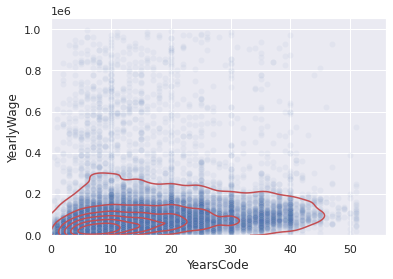

In [123]:
ax = sns.scatterplot(
    data=employed_full_time,
    y='YearlyWage',
    x='YearsCode',
    alpha=0.05,
)
ax = sns.kdeplot(
    data=employed_full_time,
    y='YearlyWage',
    x='YearsCode',
    color='r',
    ax=ax,
    levels=7,
    clip=[[0, np.inf], [0, np.inf]],
)

We can see the big cluster, with the small positive correlation.

As there are many data points, a scatter plot is rather difficult to read, because it doesn't show densities.

To try to make a more readable plot, we can use a filled KDE plot, which gives a better idea of the density of data points.

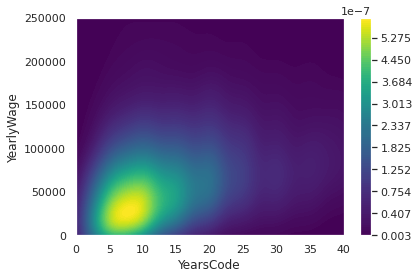

In [124]:
ax = sns.kdeplot(
    data=employed_full_time,
    y='YearlyWage',
    x='YearsCode',
    fill=True,
    thresh=0,
    levels=100,
    cmap="viridis",
    cbar=True,
    clip=[[0, 40], [0, 250000]],
)

If we make scatter and 2D KDE plots for the other three columns, we get similar results to the previous one.

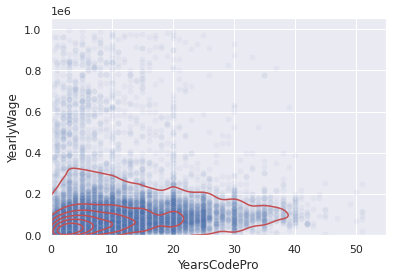

In [125]:
ax = sns.scatterplot(
    data=employed_full_time,
    y='YearlyWage',
    x='YearsCodePro',
    alpha=0.05,
)
ax = sns.kdeplot(
    data=employed_full_time,
    y='YearlyWage',
    x='YearsCodePro',
    color='r',
    ax=ax,
    levels=7,
    clip=[[0, np.inf], [0, np.inf]],
)

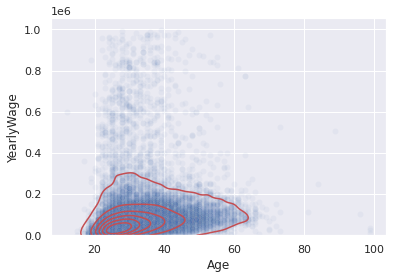

In [126]:
ax = sns.scatterplot(
    data=employed_full_time,
    y='YearlyWage',
    x='Age',
    alpha=0.05,
)
ax = sns.kdeplot(
    data=employed_full_time,
    y='YearlyWage',
    x='Age',
    color='r',
    ax=ax,
    levels=7,
    clip=[[0, np.inf], [0, np.inf]],
)

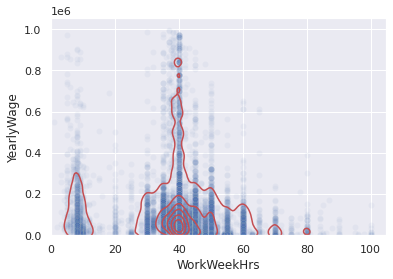

In [127]:
ax = sns.scatterplot(
    data=employed_full_time,
    y='YearlyWage',
    x='WorkWeekHrs',
    alpha=0.05,
)
ax = sns.kdeplot(
    data=employed_full_time,
    y='YearlyWage',
    x='WorkWeekHrs',
    color='r',
    ax=ax,
    levels=7,
    clip=[[0, np.inf], [0, np.inf]],
)

In all the plots, binning is noticeable, but it doesn't cause much problem (it doesn't make the plots harder to read).

For `WorkWeekHrs` the problem is more extreme, and binning obscures the clusters. This could be mitigated by adding random noise on each data point, to smooth binning.

Calculating correlations for the `WorkWeekHrs` column, in the same way, we get no further insights. The only correlations that are above our thresholds are meaningless or already known.

In [128]:
corr1 = pd.DataFrame()
for col in employed_full_time.select_dtypes(include=['number']).columns:
    corr1.insert(
        column=col,
        value=stats.pearsonr(employed_full_time.dropna(subset=[col])['WorkWeekHrs'],
                             employed_full_time.dropna(subset=[col])[col]),
        loc=0,
    )

correlation = corr1.T.rename(mapper={0: 'pearson r', 1: 'p-value'}, axis=1)
display(
    correlation[(correlation['p-value'] < alpha) & (np.abs(correlation['pearson r']) >= pearsonr_cutoff)].sort_values(
        by='pearson r', ascending=False, key=abs))

,pearson r,p-value
WorkWeekHrs,1.000000,0.000000e+00
YearlyWage,-0.117686,2.910417e-89
HourlyWage,-0.117686,2.910417e-89


# Conclusion
## Further analysis possibilities
The Stack Overflow Developer Survey has many opportunities worth exploring. To name a few options that weren't explored:

* How does education level relate to salary, job satisfaction or participation in Stack Overflow?

* Using the columns that represent the total amount of years of coding experience, the amount of years of professional coding experience, and the duration of the coding-related education, is there a sign that experience can replace education (in terms of wages)?

* What is the correlation to ranking-type variables (for example, hours worked per week and job satisfaction)?

  To answer this question, we can't use Pearson's r, for it describes the (linear) relationship between *cardinal* variables, but ranking-type varibles are *ordinal*. Instead, we could use [Kendall's $\tau$ (tau)](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient) or [Spearman's $\rho$ (rho)](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient).

* How is the use of different technologies related to job satisfaction?

* Are certain technologies used together (for example, `PostgreSQL` and `Java`)?

* Do the distributions of technology usage differ by country?

* How does the distribution of wages by country look like, when normalised with respect to the median wage of each country?

* Are there any non-linearly correlated variables?

* How do survey results relate to past years?

This are only a few examples, and many more could be devised.

## Parting thoughts
In this notebook, we performed a basic data science analysis. We worked with different datasets, going through the whole process workflow.

We made several computations and visualisations to try to better understand the data.

This was my second try at a data science analysis, done without the help of a tutorial, in the form of a more custom-made project.